# Pokemon Project
This is the analysis of the statistics of all 800 Pokemon from 7 editions.
The dataset can be found here: https://www.kaggle.com/datasets/rounakbanik/pokemon

I will try to find any correlations between the statistics, types and abilities of Pokemons. I would like to know what will be the average Pokemon. Are there any clear differences between normal and legendary Pokemon? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Importing the dataset from the csv file

In [2]:
df = pd.read_csv("pokemon.csv")
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

# Data preparation
Some data is missing. In the column type2 a lot of rows are empty, but second type is optional, so this is fine. 
Mising data in weight, heigth and percentage_male also can probably stay. 

In [4]:
df.loc[df.weight_kg.isnull()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,19,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,20,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,50.0,26,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,27,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,28,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,37,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,38,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,50,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,51,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,52,50,40,90,normal,dark,NaN,1,0


In [5]:
df["classfication"]

0             Seed Pokémon
1             Seed Pokémon
2             Seed Pokémon
3           Lizard Pokémon
4            Flame Pokémon
              ...         
796         Launch Pokémon
797    Drawn Sword Pokémon
798      Junkivore Pokémon
799          Prism Pokémon
800     Artificial Pokémon
Name: classfication, Length: 801, dtype: object

Columns japanese_name and pokedex_number can be droped, as those are not usefull in this analysis

In [6]:
df.drop(columns = ["japanese_name", "pokedex_number"], inplace = True)
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,Celesteela,NaN,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kartana,NaN,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Guzzlord,NaN,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,Necrozma,NaN,127,89,79,psychic,NaN,230.0,7,1


# Checking for the unique values


In [7]:
df.nunique()

abilities            482
against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
capture_rate          34
classfication        588
defense              109
experience_growth      6
height_m              51
hp                    99
name                 801
percentage_male        7
sp_attack            111
sp_defense            97
speed                113
type1                 18
type2                 18
weight_kg            421
generation             7
is_legendary           2
dtype: int64

There are not that many unique values. As we can see even some sets of abilities can be the same. There is an additional column with the infromation about the legendary status of the pokomeno. This data type can be changed to category type


In [8]:
df.is_legendary = df.is_legendary.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   abilities          801 non-null    object  
 1   against_bug        801 non-null    float64 
 2   against_dark       801 non-null    float64 
 3   against_dragon     801 non-null    float64 
 4   against_electric   801 non-null    float64 
 5   against_fairy      801 non-null    float64 
 6   against_fight      801 non-null    float64 
 7   against_fire       801 non-null    float64 
 8   against_flying     801 non-null    float64 
 9   against_ghost      801 non-null    float64 
 10  against_grass      801 non-null    float64 
 11  against_ground     801 non-null    float64 
 12  against_ice        801 non-null    float64 
 13  against_normal     801 non-null    float64 
 14  against_poison     801 non-null    float64 
 15  against_psychic    801 non-null    float64 
 16  against_

# Analysis of the basic stats
Lets make a new table with statistics of the Pokemon.

In [9]:
stats = df[["name", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "height_m", "weight_kg",
           "generation", "is_legendary", "type1", "type2", "base_egg_steps"]].copy()
stats

,name,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,generation,is_legendary,type1,type2,base_egg_steps
0,Bulbasaur,45,49,49,65,65,45,0.7,6.9,1,0,grass,poison,5120
1,Ivysaur,60,62,63,80,80,60,1.0,13.0,1,0,grass,poison,5120
2,Venusaur,80,100,123,122,120,80,2.0,100.0,1,0,grass,poison,5120
3,Charmander,39,52,43,60,50,65,0.6,8.5,1,0,fire,NaN,5120
4,Charmeleon,58,64,58,80,65,80,1.1,19.0,1,0,fire,NaN,5120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,97,101,103,107,101,61,9.2,999.9,7,1,steel,flying,30720
797,Kartana,59,181,131,59,31,109,0.3,0.1,7,1,grass,steel,30720
798,Guzzlord,223,101,53,97,53,43,5.5,888.0,7,1,dark,dragon,30720
799,Necrozma,97,107,101,127,89,79,2.4,230.0,7,1,psychic,NaN,30720


In [10]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            801 non-null    object  
 1   hp              801 non-null    int64   
 2   attack          801 non-null    int64   
 3   defense         801 non-null    int64   
 4   sp_attack       801 non-null    int64   
 5   sp_defense      801 non-null    int64   
 6   speed           801 non-null    int64   
 7   height_m        781 non-null    float64 
 8   weight_kg       781 non-null    float64 
 9   generation      801 non-null    int64   
 10  is_legendary    801 non-null    category
 11  type1           801 non-null    object  
 12  type2           417 non-null    object  
 13  base_egg_steps  801 non-null    int64   
dtypes: category(1), float64(2), int64(8), object(3)
memory usage: 82.4+ KB


In [11]:
stats.describe(include = ['object'])

,name,type1,type2
count,801,801,417
unique,801,18,18
top,Bulbasaur,water,flying
freq,1,114,95


In [12]:
stats.type2.isnull().value_counts()

False    417
True     384
Name: type2, dtype: int64

In [13]:
stats[stats.is_legendary == 1].type2.isnull().value_counts()

False    45
True     25
Name: type2, dtype: int64

About a half of pokemon is only single type creature. Among legendary pokemon the percentage of single type creatures is lower.

Describe function does not give much information that can be used here. We can see that the most popular type1 is water and type2 is flying. There is a high precentage of the pokemon that have no second type listed. 

Lets create basic histograms for this table

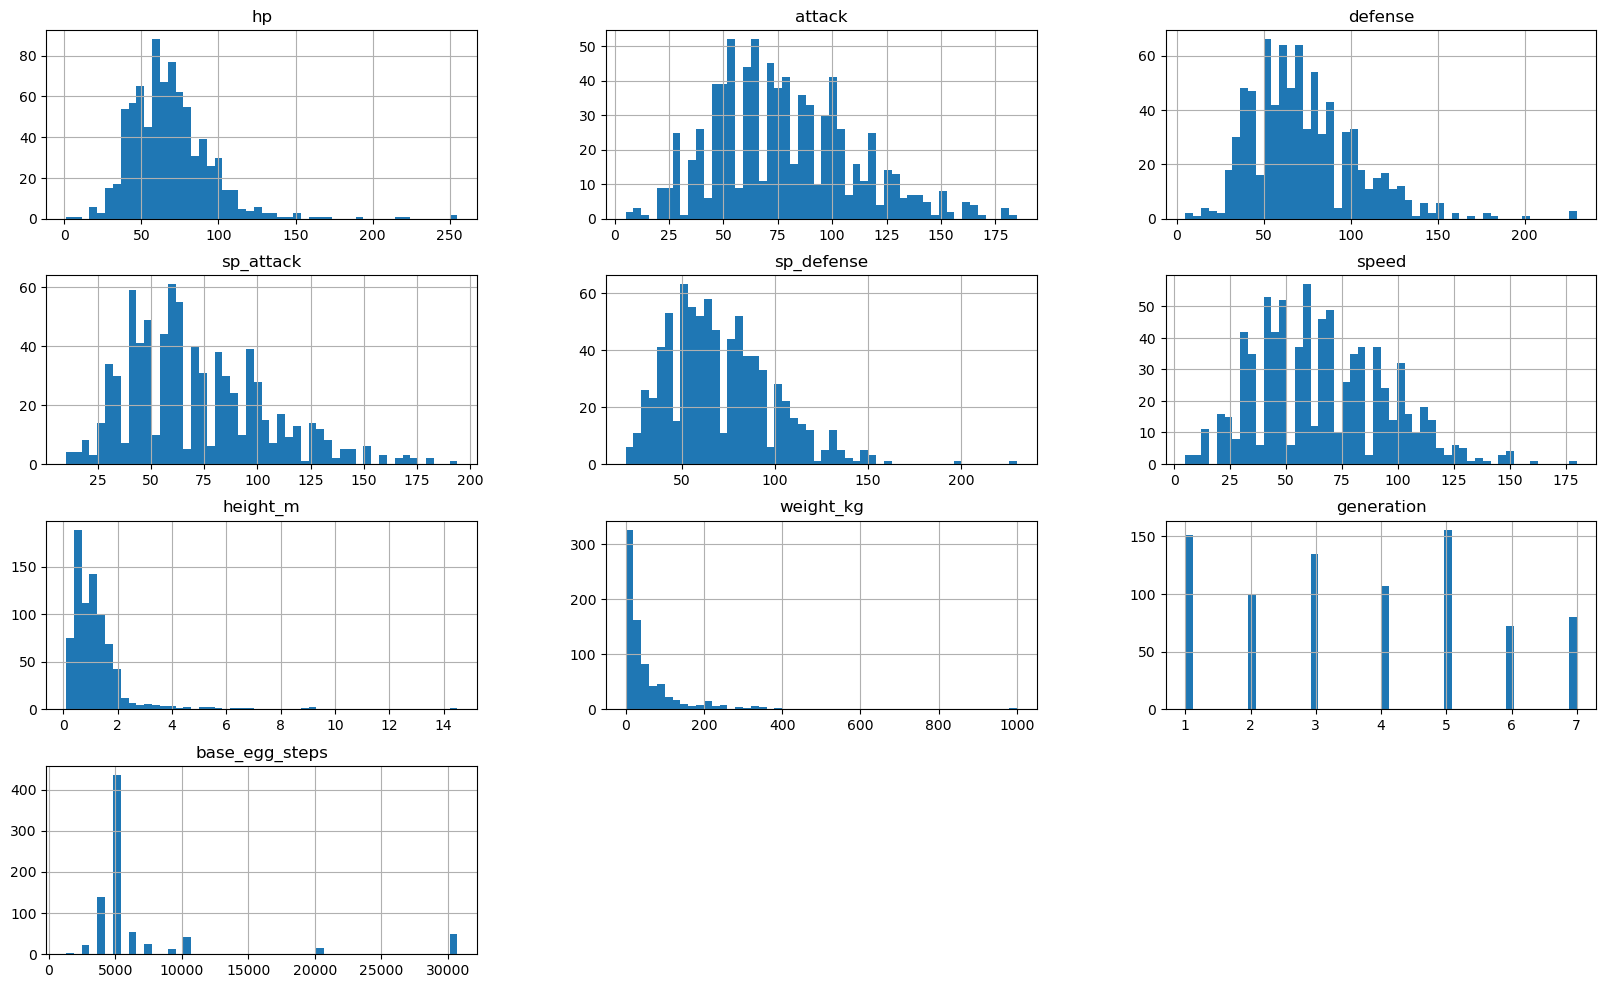

In [14]:
stats.hist(figsize=(20,12), bins = 50)
plt.show()

The majority of occurences can be found in lower range of values. It is possibly due to the ocurrence some amount of legendary pokemon in this set. Those may have higher stats than the legendary pokemon. This statement seems not true considering the graph below. It may be true for base_egg_steps (hatching time), but not for others.

The same set for legendary pokemon.

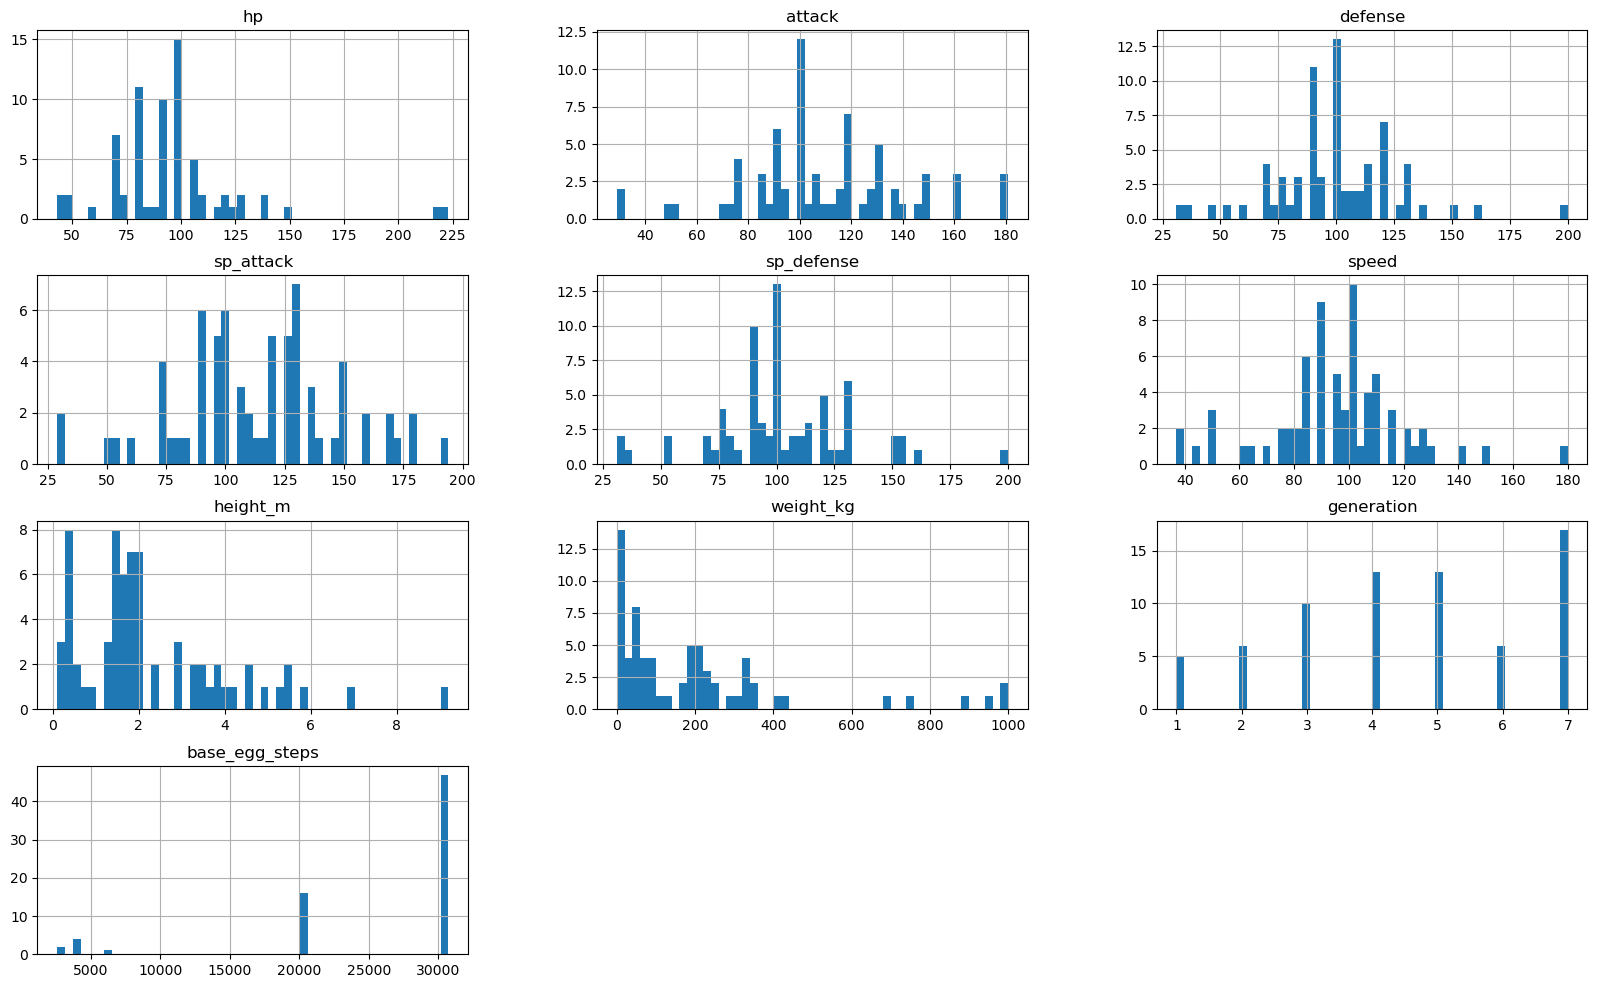

In [15]:
stats[stats.is_legendary == 1].hist(figsize=(20,12), bins = 50)
plt.show()

As we can see the hatching time is indeed higher for legendary Pokemon. The occurences of other values are similar. The majority of legendary pocemon was introduced in the last generation.

Lets take care of each individual statistic and check their dependency to not numerical stats "is_legendary", "type1", "type2"

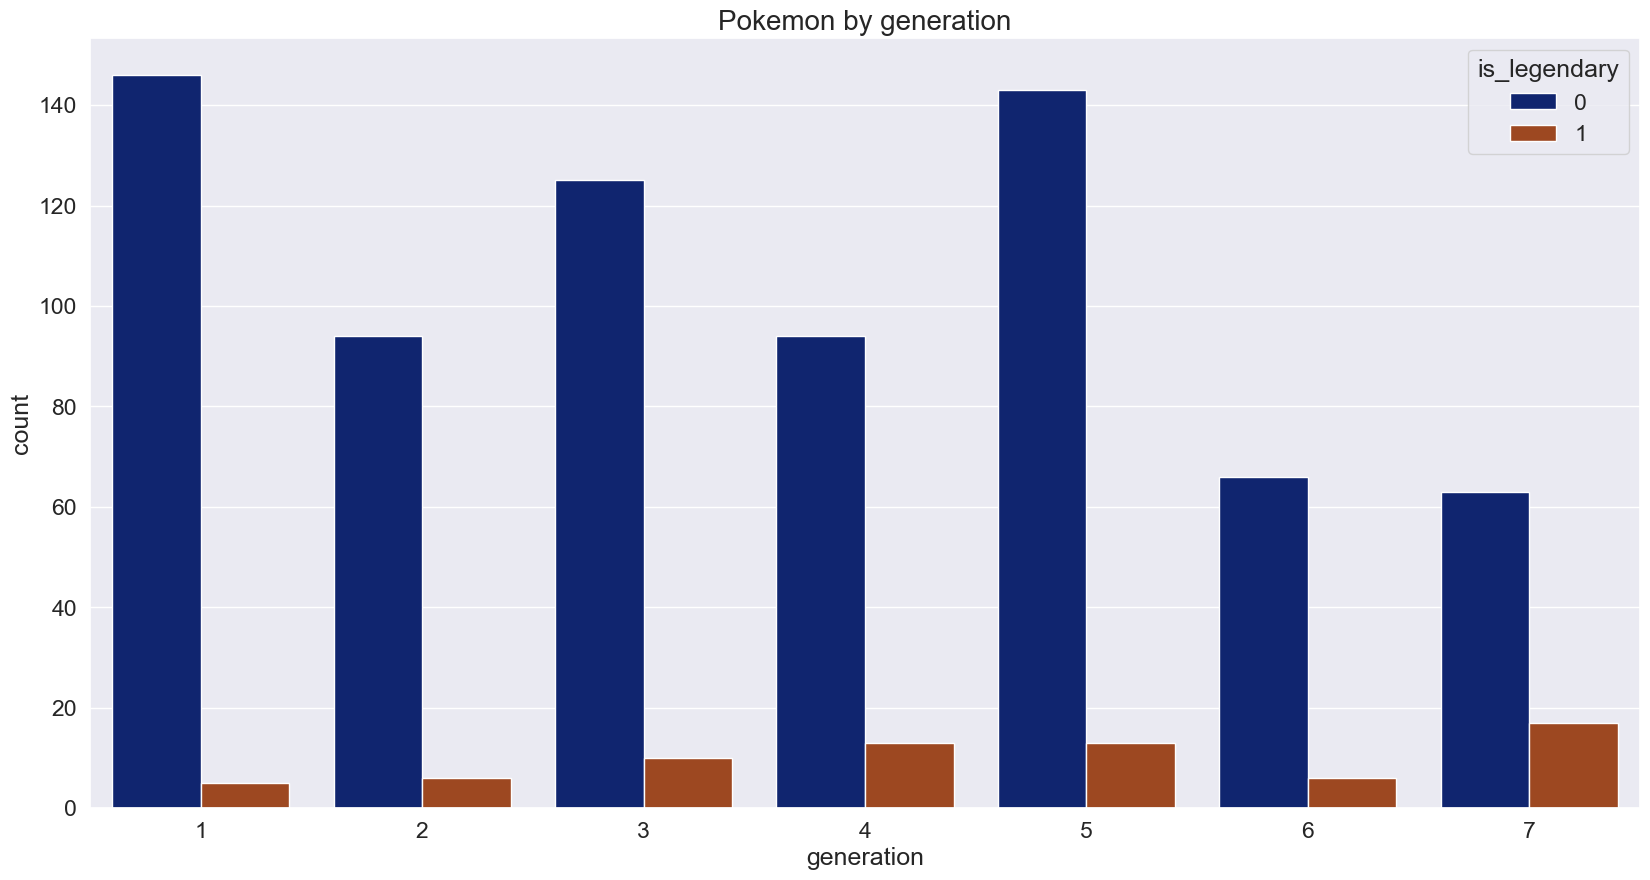

In [16]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = stats, x = "generation", hue = "is_legendary")
plt.title("Pokemon by generation", fontsize = 20)
plt.show()

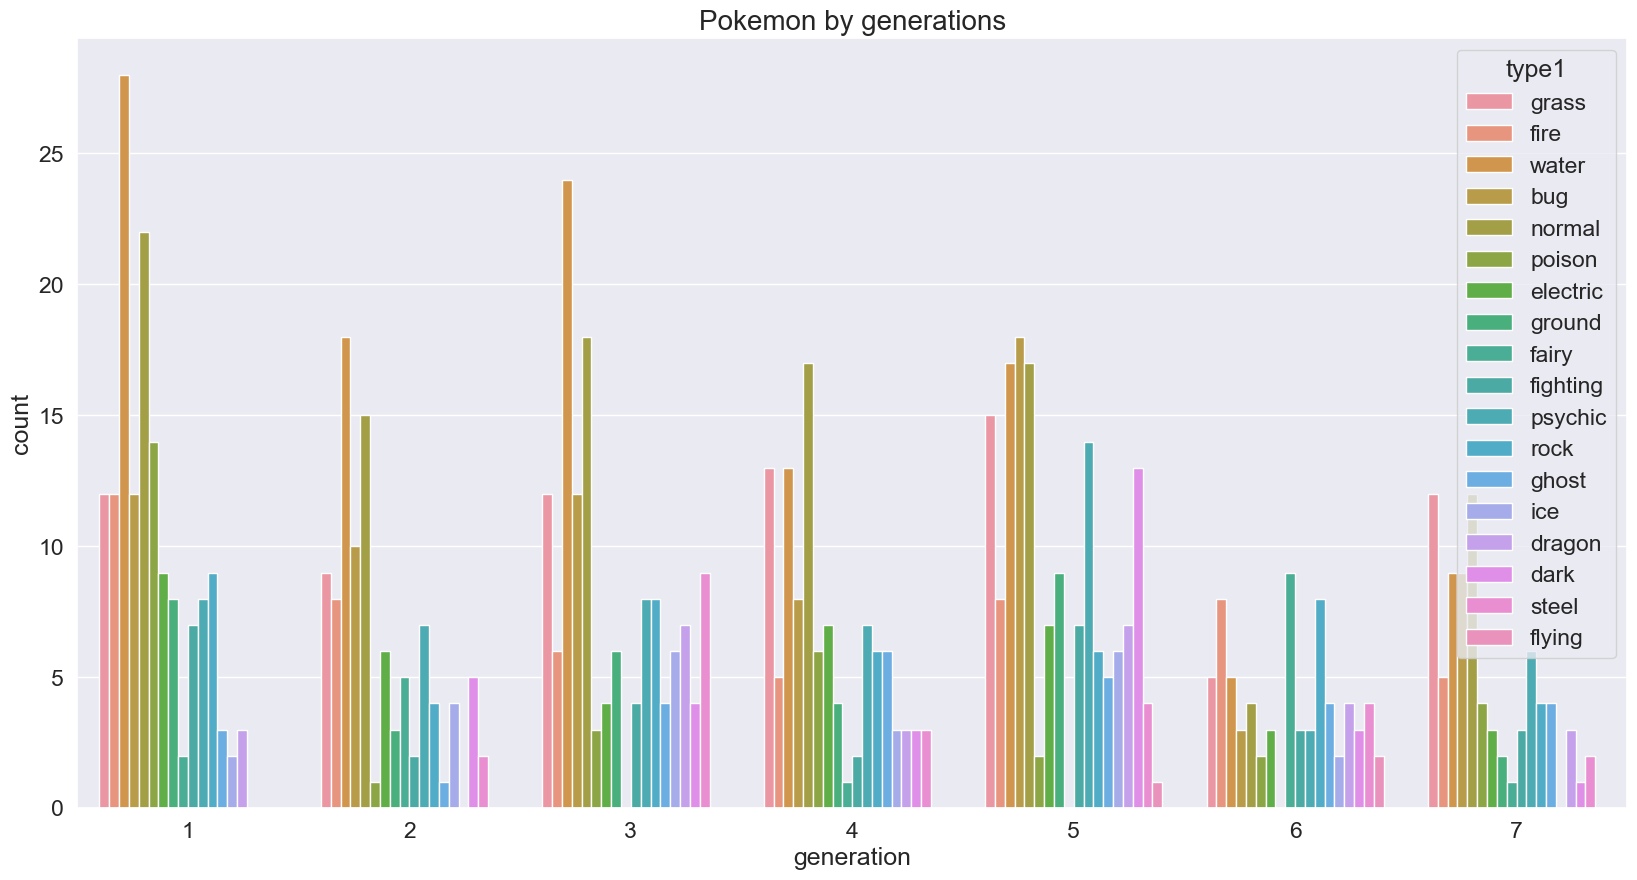

In [17]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = stats, x = "generation", hue = "type1")
plt.title("Pokemon by generations", fontsize = 20)
plt.show()

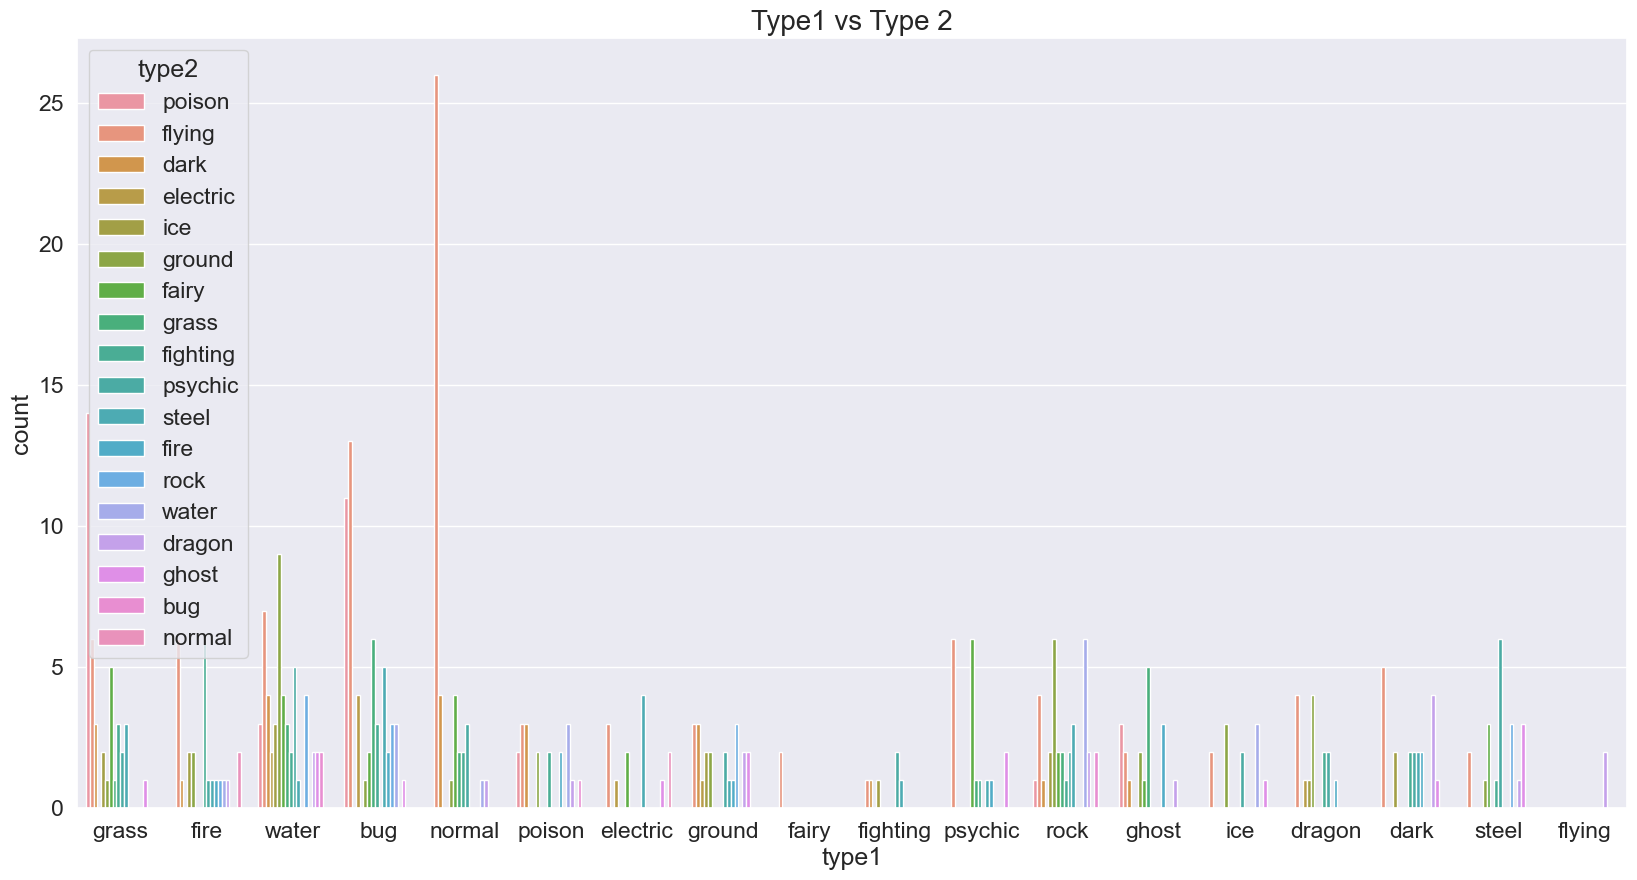

In [18]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = stats, x = "type1", hue = "type2")
plt.title("Type1 vs Type 2", fontsize = 20)
plt.show()

Water, grass, rock, fire, bug and ground pockemon show a variety of secondary types. There are two types (fairy and flying) with exclusive second type: fairy pokemon have only flying and flying pokemon are dragon only. Other types show some variety of type2 but not all types are represented.

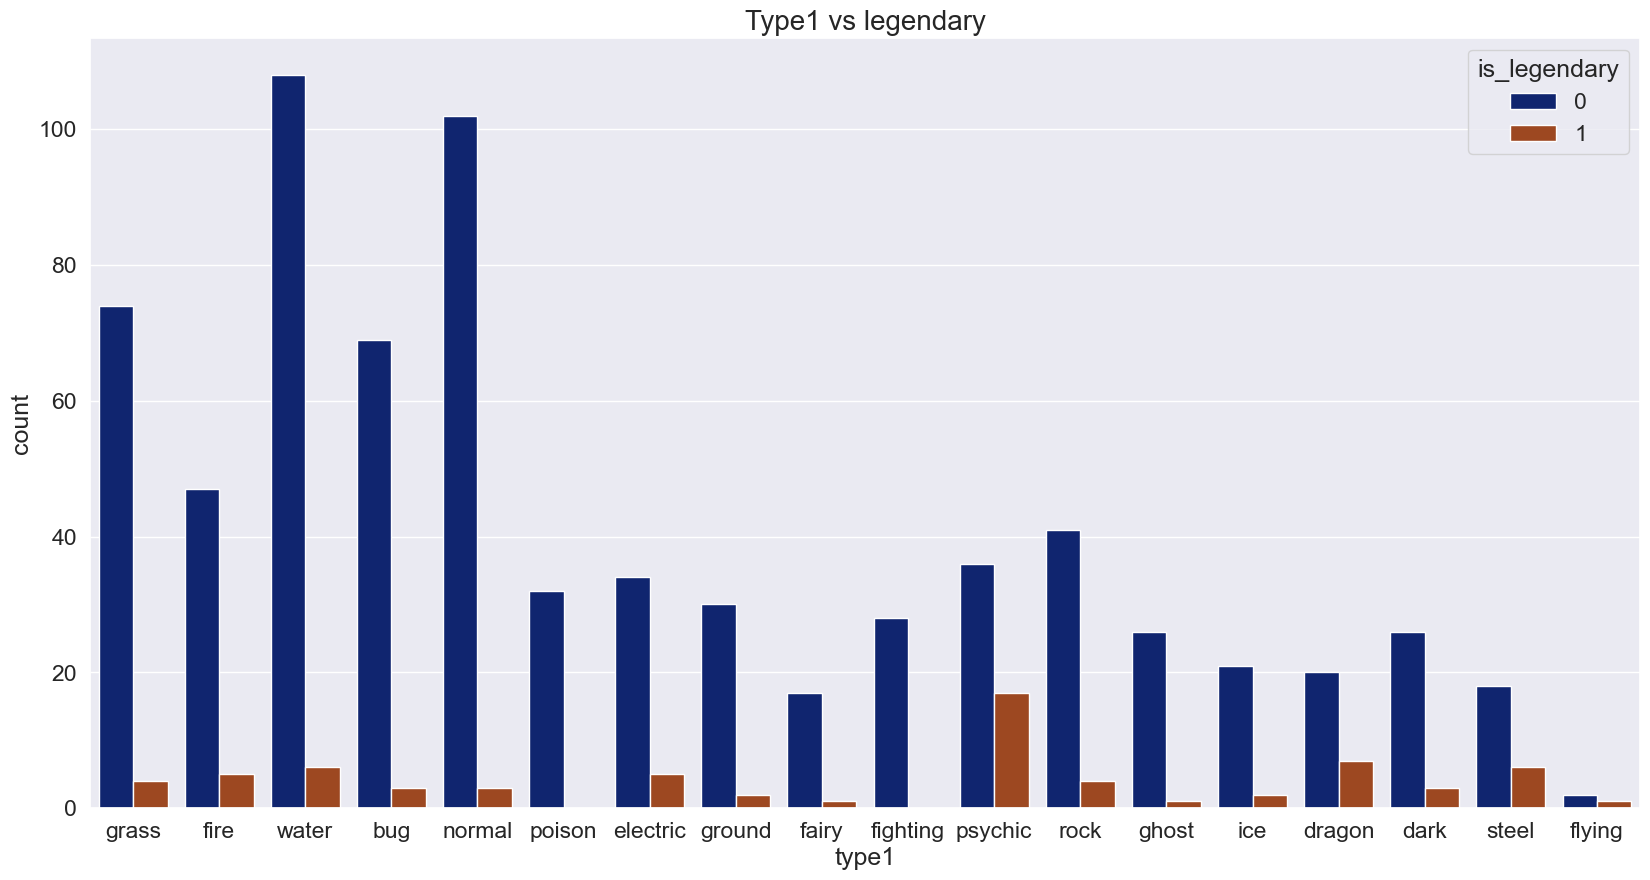

In [19]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = stats, x = "type1", hue = "is_legendary")
plt.title("Type1 vs legendary", fontsize = 20)
plt.show()

The overall rarest type1 of pokemon is flying. The most common pokemon are water, normal, grass, bug and fire. There are no legendary pokemon with type1 poison or fighting. The most popular type1 among legendary pokemon is psychic. This type is also well represented among regular pokemon but not very popular. 

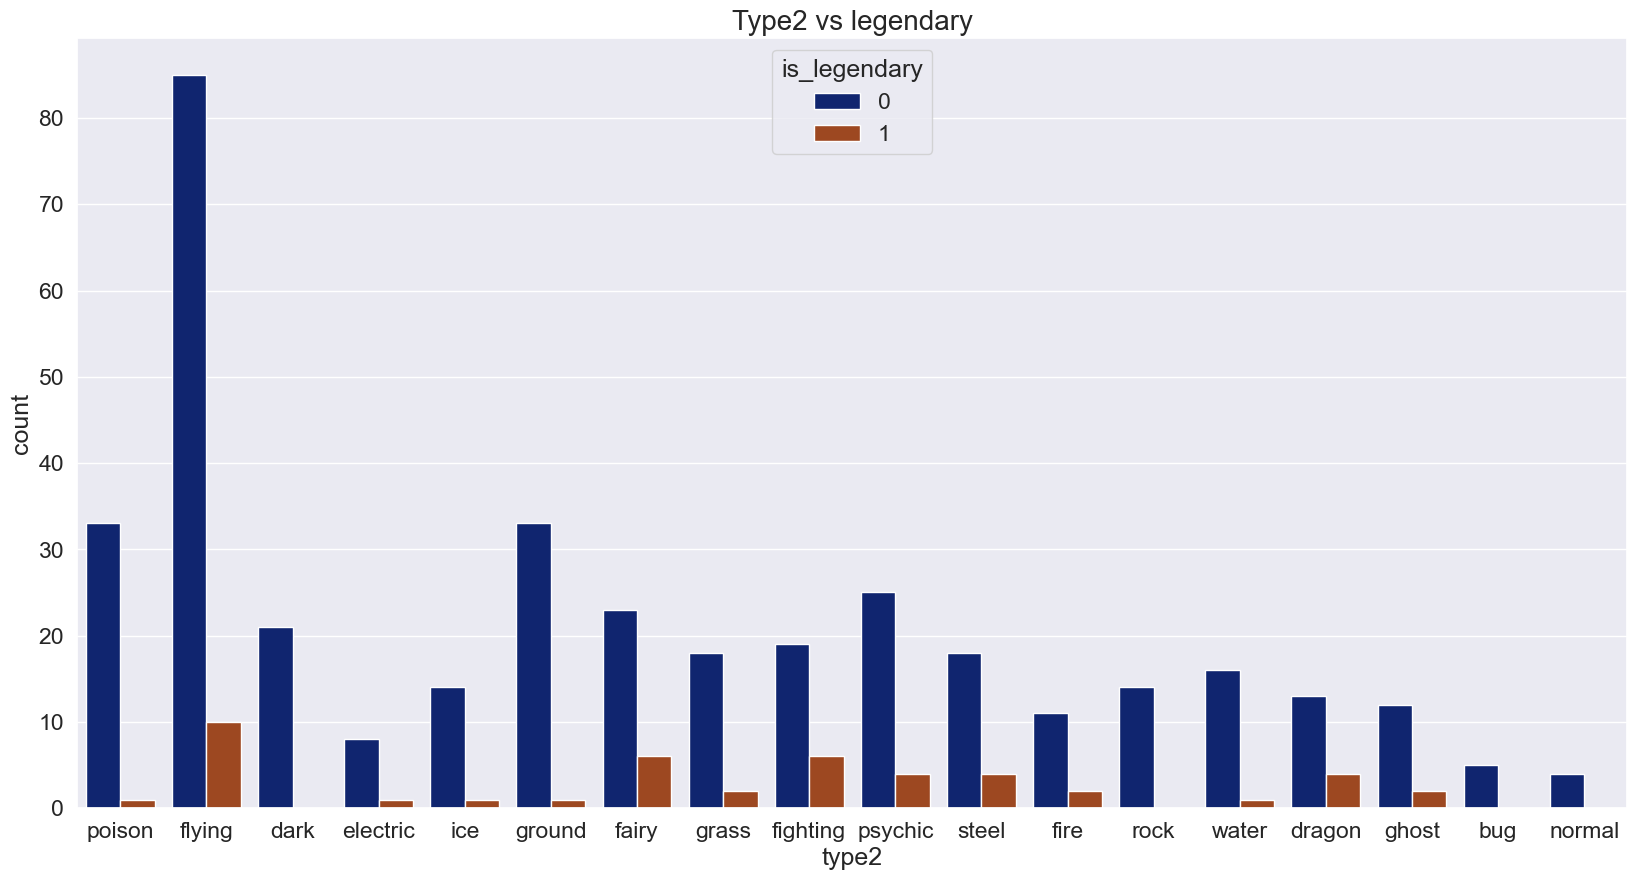

In [20]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = stats, x = "type2" , hue = "is_legendary" )
plt.title("Type2 vs legendary", fontsize = 20)
plt.show()

The most popular type2 is flying among both regular and legendary pokemon. Dark, rock, bug and normal have no representation among legendary pokemon. 

# Type1 and type2 combinations
Lets create a new column with combined type1 and type2 to check which combinations are the most popular

In [21]:
stats["type_total"] = stats.type1 + " " + stats.type2

In [22]:
totalType = stats["type_total"].value_counts()

In [23]:
totalType

normal flying    26
grass poison     14
bug flying       13
bug poison       11
water ground      9
                 ..
dragon fire       1
ghost dark        1
dragon ice        1
fire psychic      1
rock poison       1
Name: type_total, Length: 148, dtype: int64

In [24]:
totalType.head(10)

normal flying    26
grass poison     14
bug flying       13
bug poison       11
water ground      9
water flying      7
rock ground       6
fire flying       6
fire fighting     6
grass flying      6
Name: type_total, dtype: int64

As expected some of the most popular type1 are on the list of first 10 combined types. We can also see that the most popular type1 - water occurs only in 2 combinations in this first 10 occurences. Probably this type appears in some less popular combinations or as a single type. 
We can also see that the most popular combined type is normal flying. Lets find out more about this combination.

In [25]:
popularTypes = stats[stats.type_total == "normal flying"].copy()
popularTypes

,name,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,generation,is_legendary,type1,type2,base_egg_steps,type_total
15,Pidgey,40,45,40,35,35,56,0.3,1.8,1,0,normal,flying,3840,normal flying
16,Pidgeotto,63,60,55,50,50,71,1.1,30.0,1,0,normal,flying,3840,normal flying
17,Pidgeot,83,80,80,135,80,121,1.5,39.5,1,0,normal,flying,3840,normal flying
20,Spearow,40,60,30,31,31,70,0.3,2.0,1,0,normal,flying,3840,normal flying
21,Fearow,65,90,65,61,61,100,1.2,38.0,1,0,normal,flying,3840,normal flying
82,Farfetch'd,52,90,55,58,62,60,0.8,15.0,1,0,normal,flying,5120,normal flying
83,Doduo,35,85,45,35,35,75,1.4,39.2,1,0,normal,flying,5120,normal flying
84,Dodrio,60,110,70,60,60,110,1.8,85.2,1,0,normal,flying,5120,normal flying
162,Hoothoot,60,30,30,36,56,50,0.7,21.2,2,0,normal,flying,3840,normal flying
163,Noctowl,100,50,50,86,96,70,1.6,40.8,2,0,normal,flying,3840,normal flying


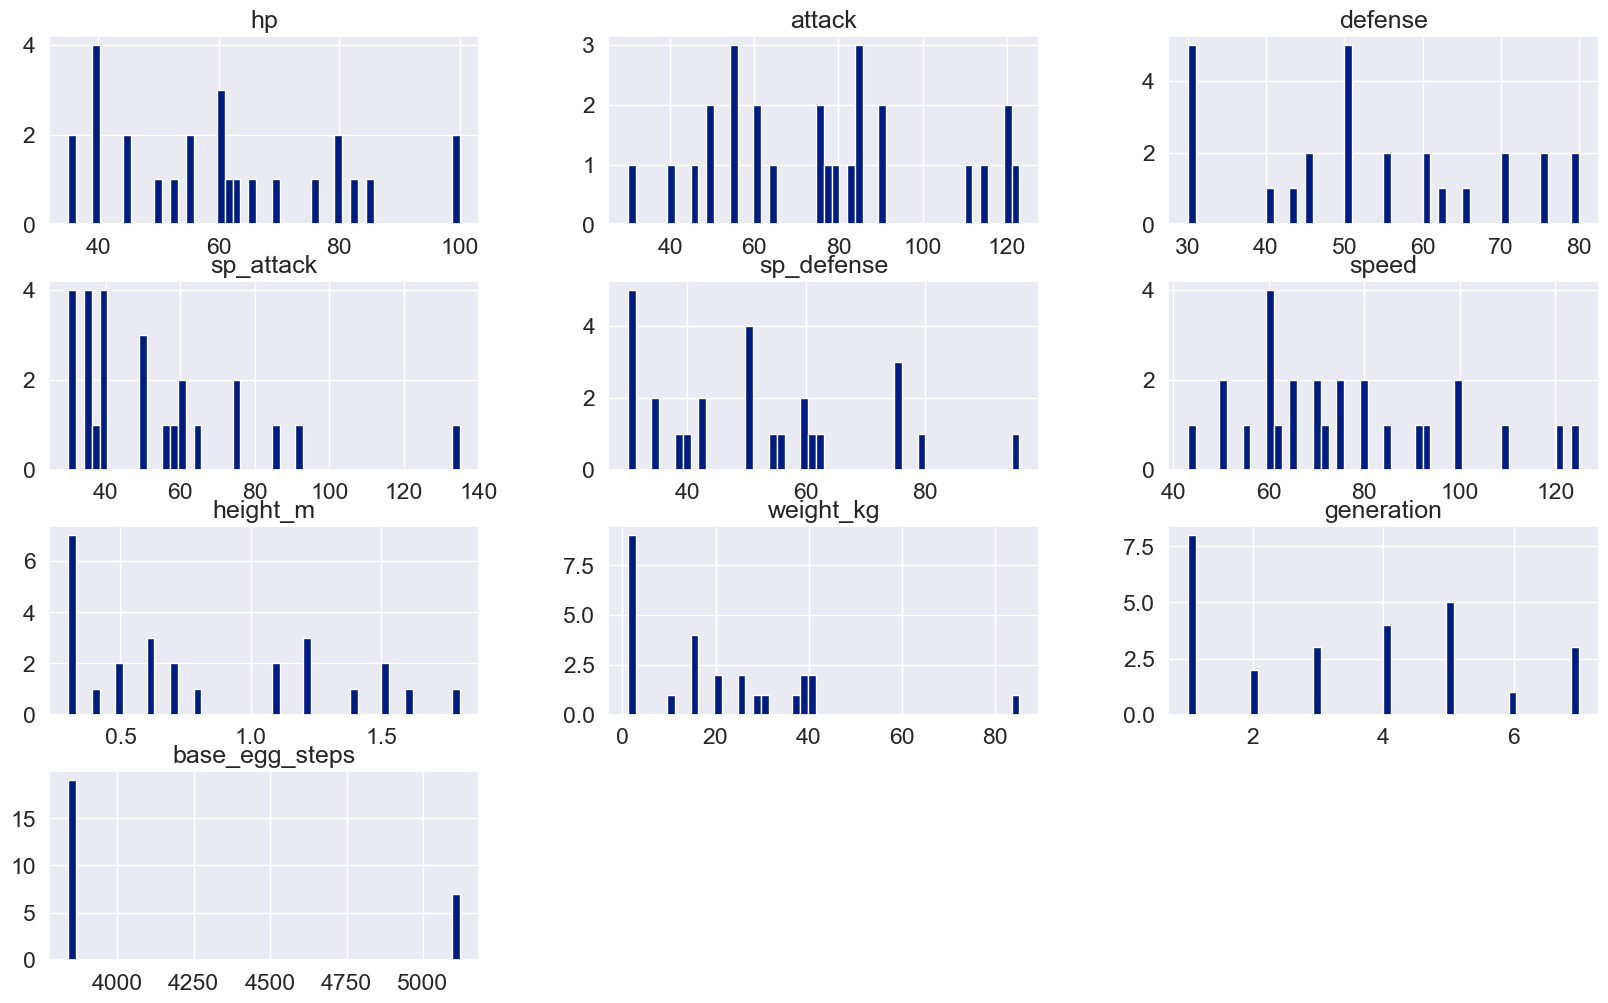

In [26]:
popularTypes.hist(figsize=(20,12), bins = 50)
plt.show()

In [27]:
popularTypes.is_legendary.value_counts()

0    26
1     0
Name: is_legendary, dtype: int64

The majority of normal flying pokemon is small and light, with medium attack force and low defence. There are only 2 values of hatching time, both on the lower spectrum of overall hatching time. Those pokemon are exclusively non legendary. 

Lets also check the other side of the spectrum - the least popular combinations of types.

In [28]:
uniqueTypes = totalType.loc[totalType == 1].index
uniqueTypes

Index(['fighting flying', 'fire rock', 'poison dragon', 'steel ground',
       'normal water', 'fighting dark', 'grass ghost', 'fire dark',
       'fighting ice', 'ground fire', 'fire dragon', 'ghost fairy',
       'normal dragon', 'psychic steel', 'fire water', 'dragon electric',
       'rock dark', 'ground steel', 'water steel', 'fighting steel',
       'poison bug', 'grass ground', 'psychic fighting', 'ice ghost',
       'electric ghost', 'steel dragon', 'fire steel', 'ghost dragon',
       'grass grass', 'psychic fire', 'fire fire', 'normal ground',
       'dark ghost', 'ground electric', 'bug ghost', 'bug ground',
       'electric electric', 'psychic grass', 'steel fighting', 'rock fighting',
       'dragon fire', 'ghost dark', 'dragon ice', 'fire psychic',
       'rock poison'],
      dtype='object')

In [29]:
uniquePokemon = stats[stats.type_total.isin(uniqueTypes)]
uniquePokemon

,name,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,generation,is_legendary,type1,type2,base_egg_steps,type_total
25,Raichu,60,85,50,95,85,110,NaN,NaN,1,0,electric,electric,2560,electric electric
104,Marowak,60,80,110,50,80,45,NaN,NaN,1,0,ground,fire,5120,ground fire
207,Steelix,75,125,230,55,95,30,9.2,400.0,2,0,steel,ground,6400,steel ground
218,Magcargo,60,50,120,90,80,30,0.8,55.0,2,0,fire,rock,5120,fire rock
247,Tyranitar,100,164,150,95,120,71,2.0,202.0,2,0,rock,dark,10240,rock dark
250,Celebi,100,100,100,100,100,100,0.6,5.0,2,1,psychic,grass,30720,psychic grass
289,Nincada,31,45,90,30,30,40,0.5,5.5,3,0,bug,ground,3840,bug ground
291,Shedinja,1,90,45,30,30,40,0.8,1.2,3,0,bug,ghost,3840,bug ghost
301,Sableye,50,85,125,85,115,20,0.5,11.0,3,0,dark,ghost,6400,dark ghost
388,Torterra,95,109,105,75,85,56,2.2,310.0,4,0,grass,ground,5120,grass ground


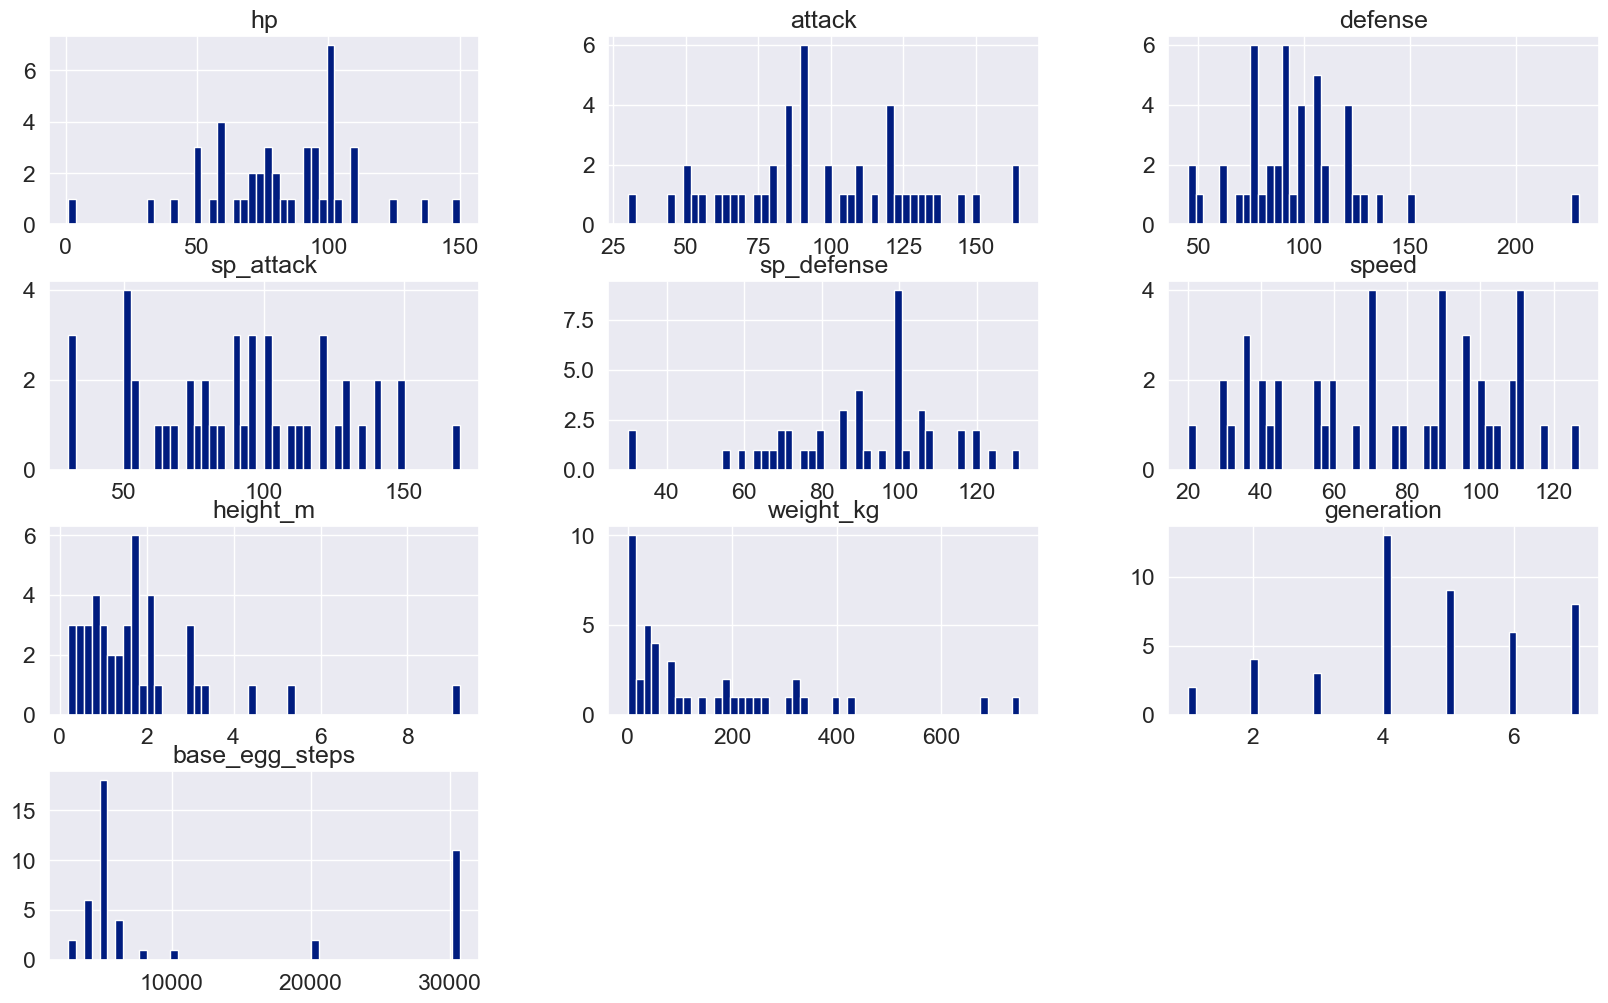

In [30]:
uniquePokemon.hist(figsize=(20,12), bins = 50)
plt.show()

In [31]:
uniquePokemon.is_legendary.value_counts()

0    31
1    14
Name: is_legendary, dtype: int64

These pokemon show medium attack, defence and hp values.In general those species are also smaller. The majority from this group is non legendary pokemon, but there is a group of legendary pokemon as well.

Lets check if there are any pokemon with the same first and second type. This is probably a mistake in the dataset, but as I am not sure if it is true, so I will not correct it.

In [32]:
stats[stats.type1 == stats.type2]

,name,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,generation,is_legendary,type1,type2,base_egg_steps,type_total
25,Raichu,60,85,50,95,85,110,NaN,NaN,1,0,electric,electric,2560,electric electric
49,Diglett,10,55,30,35,45,90,NaN,NaN,1,0,ground,ground,5120,ground ground
50,Dugtrio,35,100,60,50,70,110,NaN,NaN,1,0,ground,ground,5120,ground ground
87,Grimer,80,80,50,40,50,25,NaN,NaN,1,0,poison,poison,5120,poison poison
88,Muk,105,105,75,65,100,50,NaN,NaN,1,0,poison,poison,5120,poison poison
491,Shaymin,100,103,75,120,75,127,0.2,2.1,4,1,grass,grass,30720,grass grass
554,Darmanitan,105,30,105,140,105,55,1.3,92.9,5,0,fire,fire,5120,fire fire


# Pokemon with only one type

In [33]:
singleType = stats[stats.type2.isnull()].copy()
singleType

,name,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg,generation,is_legendary,type1,type2,base_egg_steps,type_total
3,Charmander,39,52,43,60,50,65,0.6,8.5,1,0,fire,NaN,5120,NaN
4,Charmeleon,58,64,58,80,65,80,1.1,19.0,1,0,fire,NaN,5120,NaN
6,Squirtle,44,48,65,50,64,43,0.5,9.0,1,0,water,NaN,5120,NaN
7,Wartortle,59,63,80,65,80,58,1.0,22.5,1,0,water,NaN,5120,NaN
8,Blastoise,79,103,120,135,115,78,1.6,85.5,1,0,water,NaN,5120,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,Jangmo-o,45,55,65,45,45,45,0.6,29.7,7,0,dragon,NaN,10240,NaN
788,Cosmog,43,29,31,29,31,37,0.2,0.1,7,1,psychic,NaN,30720,NaN
789,Cosmoem,43,29,131,29,131,37,0.1,999.9,7,1,psychic,NaN,30720,NaN
795,Xurkitree,83,89,71,173,71,83,3.8,100.0,7,1,electric,NaN,30720,NaN


In [34]:
singleType.type1.value_counts()

normal      61
water       61
grass       37
psychic     35
fire        27
electric    26
fighting    22
bug         18
fairy       16
poison      13
dragon      12
ice         12
rock        11
ground      10
dark         9
ghost        9
steel        4
flying       1
Name: type1, dtype: int64

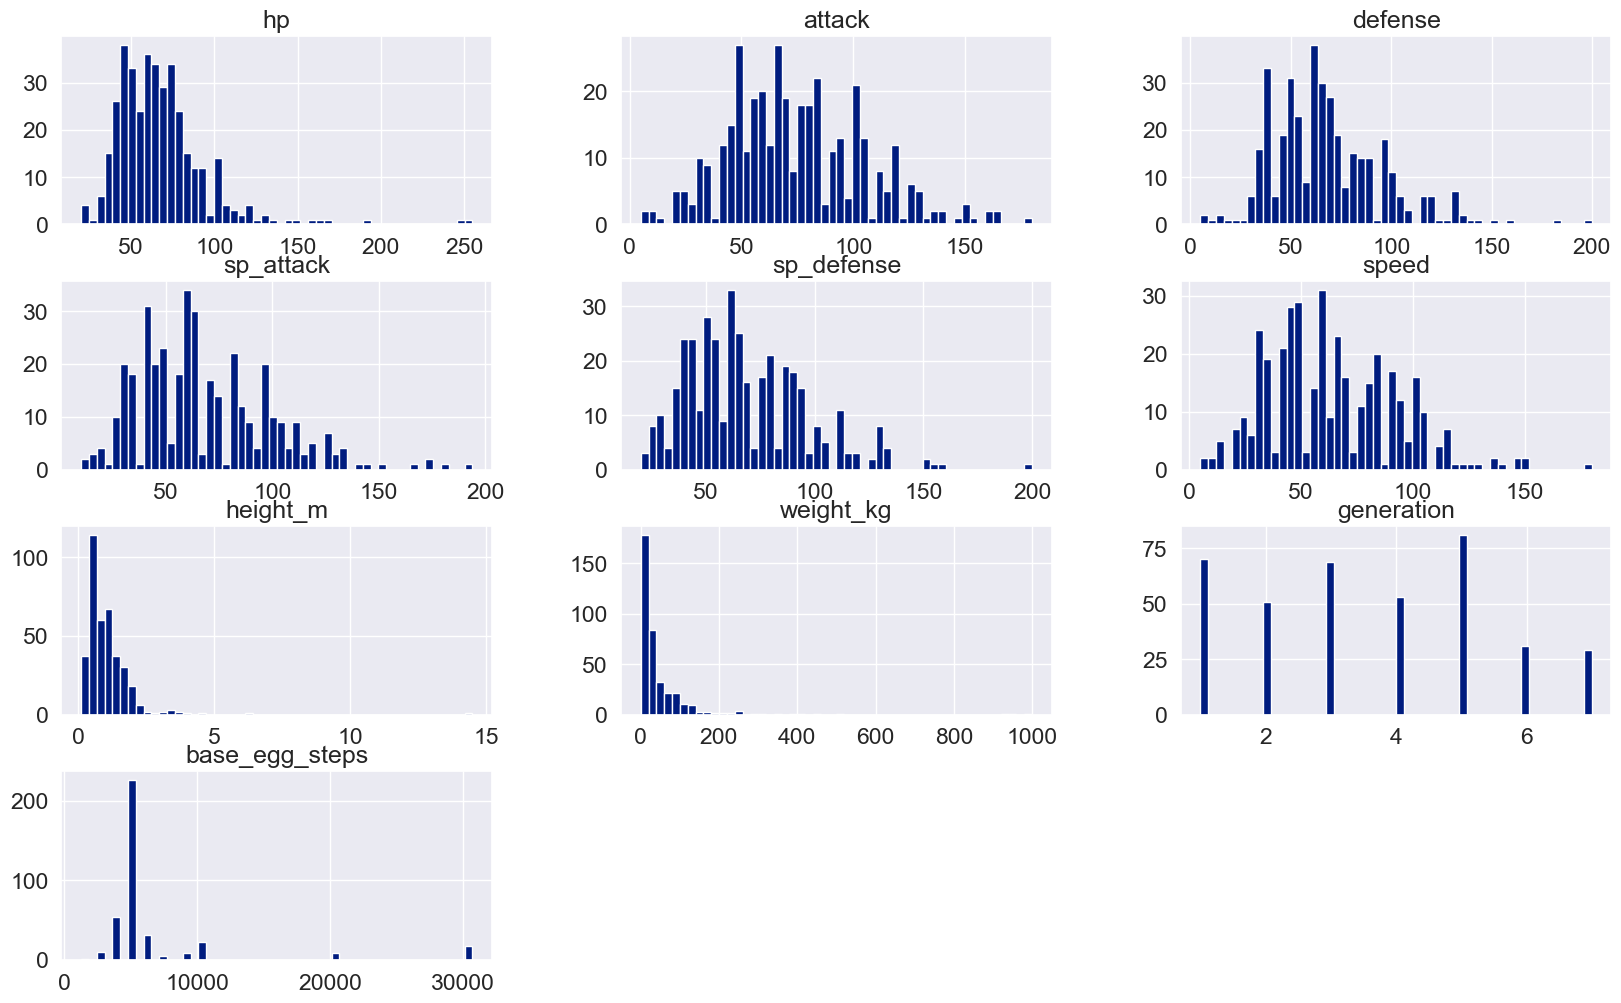

In [35]:
singleType.hist(figsize=(20,12), bins = 50)
plt.show()

In [36]:
singleType.is_legendary.value_counts()

0    359
1     25
Name: is_legendary, dtype: int64

Single type pokemon are nearly a half of the entire set. The majority of single type pokenon is non legendary and low in height. Other stats are similar to general look. 

# Dependencies between the statistics
Lets exclude spattack and defence, height and weight (to many missing values) to prepare pairplot. Generation will be now categorical value for easier handling

In [37]:
stats2 = df[["name", "hp", "attack", "defense", "speed",
           "generation", "is_legendary", "type1", "type2", "base_egg_steps"]].copy()
stats2

,name,hp,attack,defense,speed,generation,is_legendary,type1,type2,base_egg_steps
0,Bulbasaur,45,49,49,45,1,0,grass,poison,5120
1,Ivysaur,60,62,63,60,1,0,grass,poison,5120
2,Venusaur,80,100,123,80,1,0,grass,poison,5120
3,Charmander,39,52,43,65,1,0,fire,NaN,5120
4,Charmeleon,58,64,58,80,1,0,fire,NaN,5120
...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,97,101,103,61,7,1,steel,flying,30720
797,Kartana,59,181,131,109,7,1,grass,steel,30720
798,Guzzlord,223,101,53,43,7,1,dark,dragon,30720
799,Necrozma,97,107,101,79,7,1,psychic,NaN,30720


In [38]:
stats2.generation = stats2.generation.astype("category")
stats2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   name            801 non-null    object  
 1   hp              801 non-null    int64   
 2   attack          801 non-null    int64   
 3   defense         801 non-null    int64   
 4   speed           801 non-null    int64   
 5   generation      801 non-null    category
 6   is_legendary    801 non-null    category
 7   type1           801 non-null    object  
 8   type2           417 non-null    object  
 9   base_egg_steps  801 non-null    int64   
dtypes: category(2), int64(5), object(3)
memory usage: 52.2+ KB


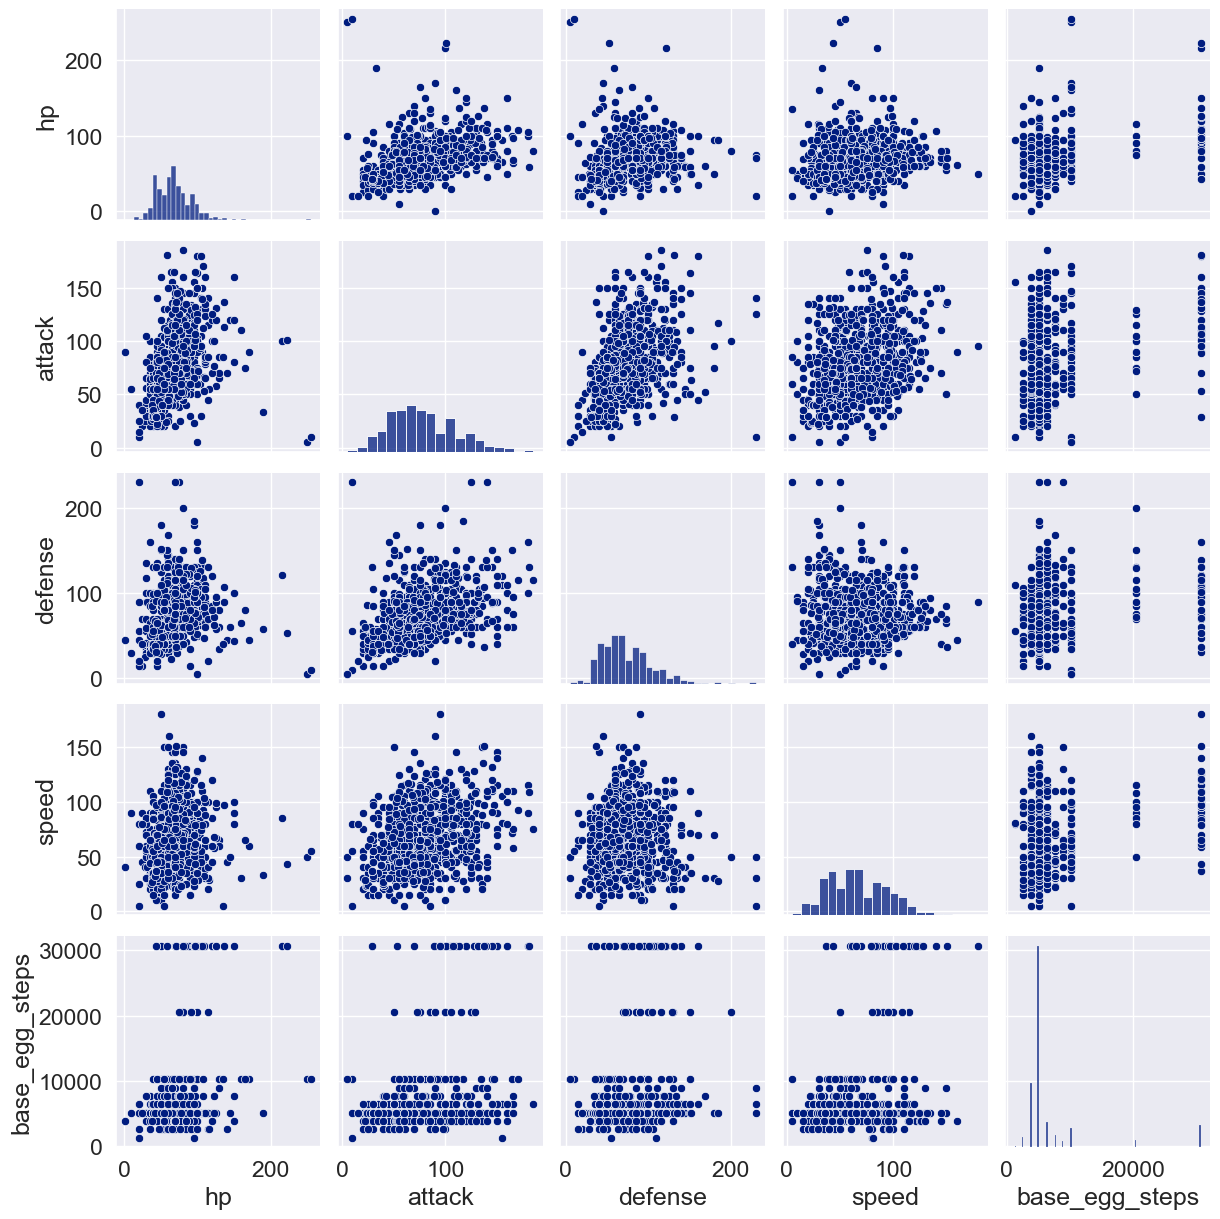

In [39]:
sns.pairplot(data=stats2)

As we can se on the plot above the majority of statistics is scattered through all the plot with few values that are outside of blocked areas. Only hatching speed is blocked into separate groups. Lets check if there is any clear distinguish  based on legendary aspect, generation or type

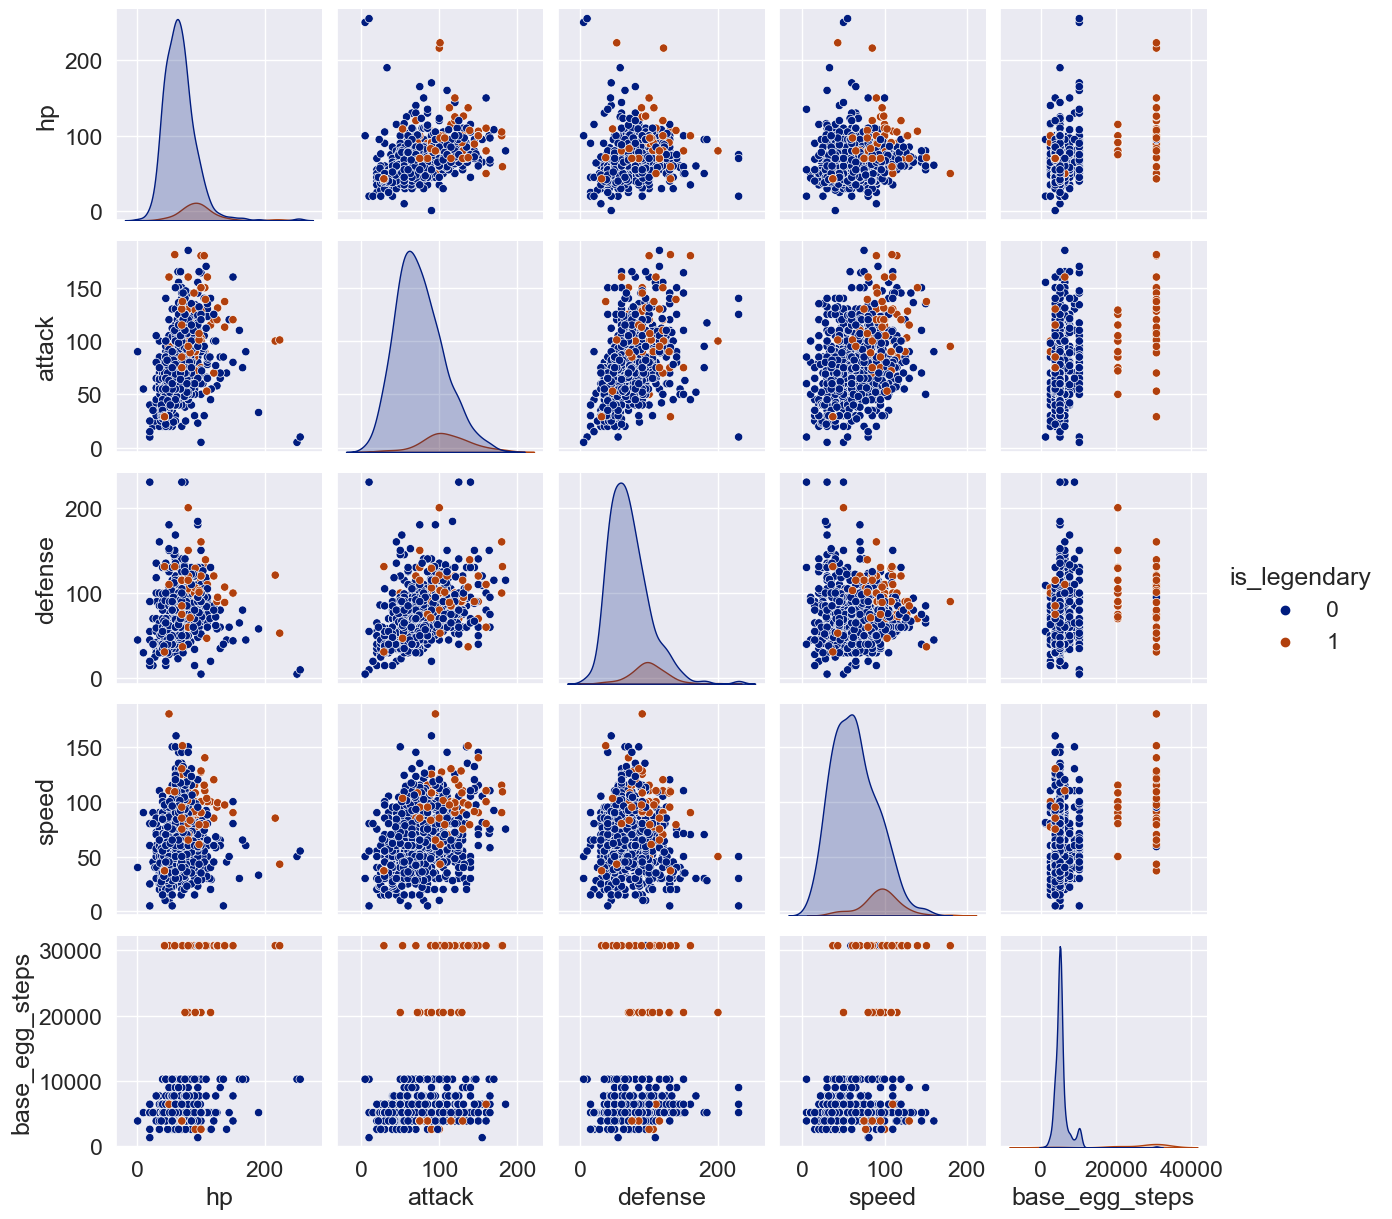

In [40]:
sns.pairplot(data=stats2, hue = "is_legendary")

A legendary aspect is clearly visible in the hatching times. The majority of pokemon is much harder to hatch. There are some legendary pokemon with lower hatching time. It won't be possible build any model to differentiate legendary pokemon with high probability.

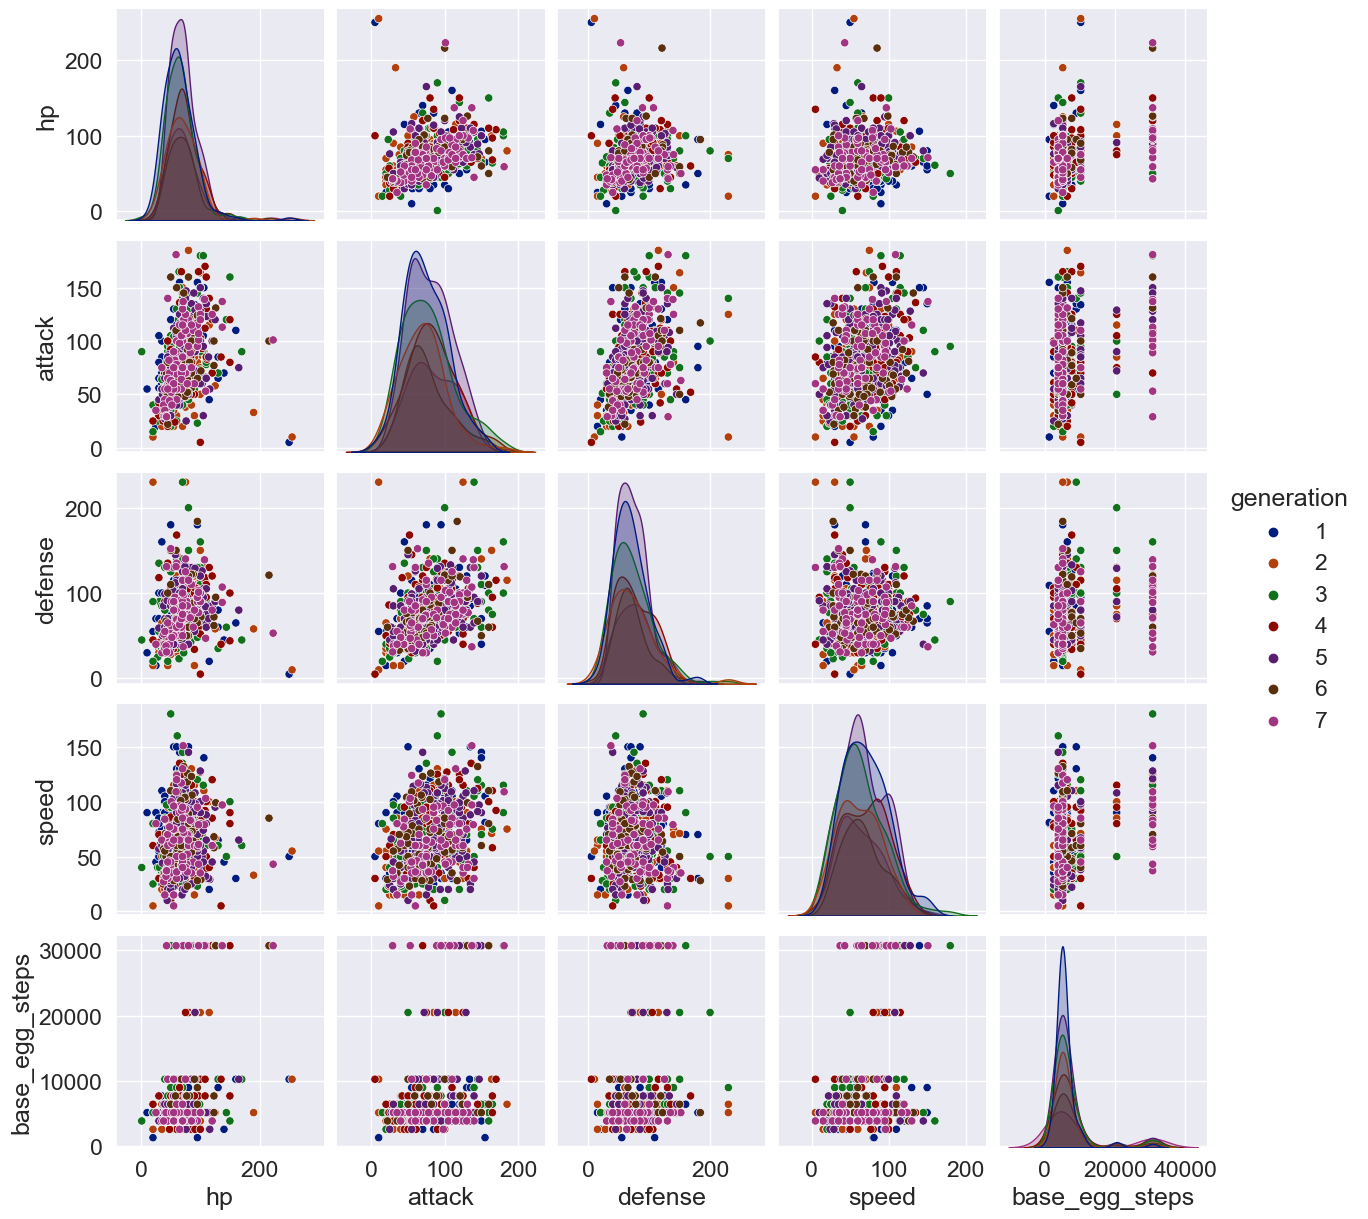

In [41]:
sns.pairplot(data=stats2, hue = "generation")

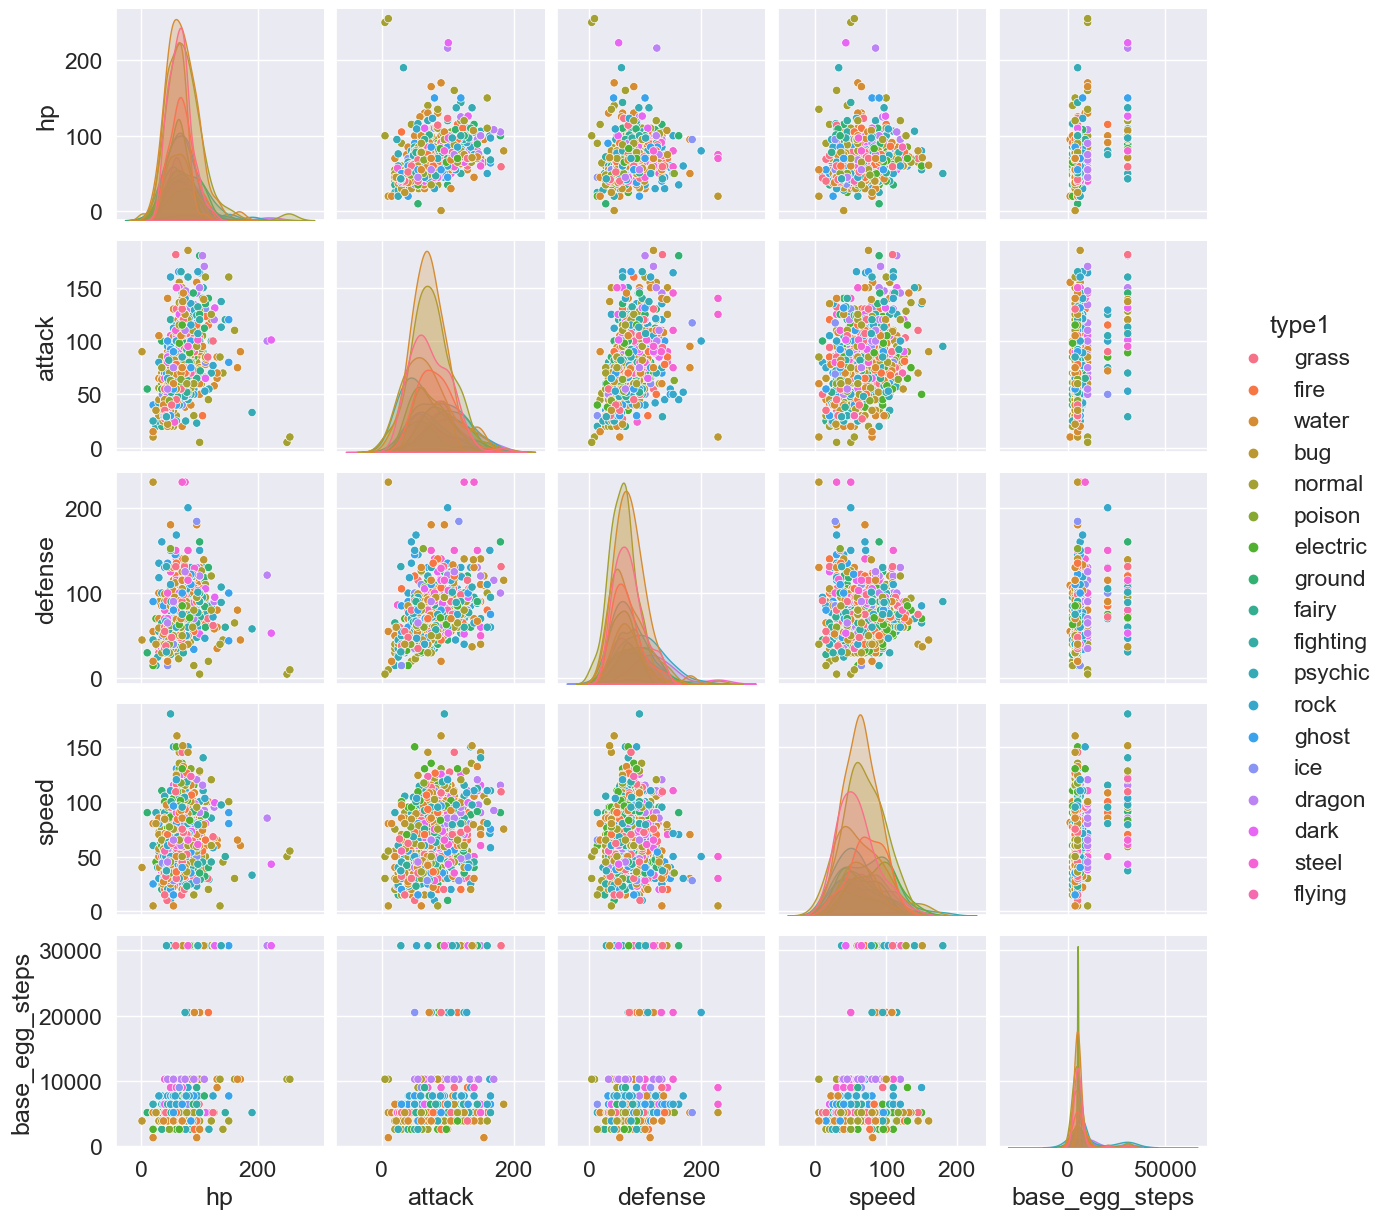

In [42]:
sns.pairplot(data=stats2, hue = "type1")

As expected nothing much can be concluded from dependencies containing type or generation. There are no clear dependencies in this area.

# Abilities
Lets check if there are any dependencies between abilities and pokemon type and legendary aspect. Lets prepare a new table containing the information we need.

In [43]:
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,Celesteela,NaN,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kartana,NaN,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Guzzlord,NaN,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,Necrozma,NaN,127,89,79,psychic,NaN,230.0,7,1


In [44]:
abilities = df[["abilities", "name", "generation", "is_legendary", "type1", "type2"]].copy()
abilities

,abilities,name,generation,is_legendary,type1,type2
0,"['Overgrow', 'Chlorophyll']",Bulbasaur,1,0,grass,poison
1,"['Overgrow', 'Chlorophyll']",Ivysaur,1,0,grass,poison
2,"['Overgrow', 'Chlorophyll']",Venusaur,1,0,grass,poison
3,"['Blaze', 'Solar Power']",Charmander,1,0,fire,NaN
4,"['Blaze', 'Solar Power']",Charmeleon,1,0,fire,NaN
...,...,...,...,...,...,...
796,['Beast Boost'],Celesteela,7,1,steel,flying
797,['Beast Boost'],Kartana,7,1,grass,steel
798,['Beast Boost'],Guzzlord,7,1,dark,dragon
799,['Prism Armor'],Necrozma,7,1,psychic,NaN


In [45]:
abilities["type_total"] = abilities.type1 + " " + abilities.type2

In [46]:
abilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   abilities     801 non-null    object  
 1   name          801 non-null    object  
 2   generation    801 non-null    int64   
 3   is_legendary  801 non-null    category
 4   type1         801 non-null    object  
 5   type2         417 non-null    object  
 6   type_total    417 non-null    object  
dtypes: category(1), int64(1), object(5)
memory usage: 38.6+ KB


In [47]:
skills = abilities.abilities.value_counts()
skills

['Levitate']                                     29
['Beast Boost']                                   7
['Shed Skin']                                     5
['Justified']                                     4
['Poison Point', 'Rivalry', 'Hustle']             4
                                                 ..
['Swift Swim', 'Oblivious', 'Adaptability']       1
['Shed Skin', 'Infiltrator']                      1
['Immunity', 'Toxic Boost']                       1
['Hyper Cutter', 'Arena Trap', 'Sheer Force']     1
['Soul-Heart']                                    1
Name: abilities, Length: 482, dtype: int64

It looks like sets of default abilities are very unique among pokemon. Te most popular is levitation alone. Lets examine this group further

In [48]:
high_skill = skills.loc[skills == skills.max()].index
high_skill

Index(['['Levitate']'], dtype='object')

In [49]:
levitators = abilities[abilities.abilities ==  high_skill[0]]
levitators

,abilities,name,generation,is_legendary,type1,type2,type_total
91,['Levitate'],Gastly,1,0,ghost,poison,ghost poison
92,['Levitate'],Haunter,1,0,ghost,poison,ghost poison
108,['Levitate'],Koffing,1,0,poison,NaN,NaN
109,['Levitate'],Weezing,1,0,poison,NaN,NaN
199,['Levitate'],Misdreavus,2,0,ghost,NaN,NaN
200,['Levitate'],Unown,2,0,psychic,NaN,NaN
328,['Levitate'],Vibrava,3,0,ground,dragon,ground dragon
329,['Levitate'],Flygon,3,0,ground,dragon,ground dragon
336,['Levitate'],Lunatone,3,0,rock,psychic,rock psychic
337,['Levitate'],Solrock,3,0,rock,psychic,rock psychic


In [50]:
levitators.type1.value_counts()

psychic     7
ghost       4
ground      4
electric    4
poison      2
rock        2
dragon      2
grass       1
ice         1
dark        1
bug         1
Name: type1, dtype: int64

In [51]:
levitators.type2.value_counts()

psychic     6
dragon      3
poison      2
ghost       1
electric    1
Name: type2, dtype: int64

In [52]:
levitators.is_legendary.value_counts()

0    23
1     6
Name: is_legendary, dtype: int64

In [53]:
levitators.generation.value_counts()

3    9
4    8
5    5
1    4
2    2
7    1
Name: generation, dtype: int64

As we can see this kind of pokemon are from various of types. None of those are from two most popular type1 (water or normal). The majority of species from this group is non legendary but there also are some legendary. None of those was introduced in generation 6.

# Number of abilities
Lets check how many default abilities pokemon usualy have

In [54]:
abilities

,abilities,name,generation,is_legendary,type1,type2,type_total
0,"['Overgrow', 'Chlorophyll']",Bulbasaur,1,0,grass,poison,grass poison
1,"['Overgrow', 'Chlorophyll']",Ivysaur,1,0,grass,poison,grass poison
2,"['Overgrow', 'Chlorophyll']",Venusaur,1,0,grass,poison,grass poison
3,"['Blaze', 'Solar Power']",Charmander,1,0,fire,NaN,NaN
4,"['Blaze', 'Solar Power']",Charmeleon,1,0,fire,NaN,NaN
...,...,...,...,...,...,...,...
796,['Beast Boost'],Celesteela,7,1,steel,flying,steel flying
797,['Beast Boost'],Kartana,7,1,grass,steel,grass steel
798,['Beast Boost'],Guzzlord,7,1,dark,dragon,dark dragon
799,['Prism Armor'],Necrozma,7,1,psychic,NaN,NaN


In [55]:
abilities.abilities[0]

"['Overgrow', 'Chlorophyll']"

Abilities are stored as string that looks like list. It would be better to have actual lists here for easier handling. This can be done using json library.

In [56]:
import json

In [57]:
abilities.abilities.apply(lambda x: json.loads(x.replace("'",'"')))[0]

['Overgrow', 'Chlorophyll']

Lets replace abilities column with lists of values

In [58]:
abilities['abilities'] = abilities.abilities.apply(lambda x: json.loads(x.replace("'",'"')))

In [59]:
abilities

,abilities,name,generation,is_legendary,type1,type2,type_total
0,"[Overgrow, Chlorophyll]",Bulbasaur,1,0,grass,poison,grass poison
1,"[Overgrow, Chlorophyll]",Ivysaur,1,0,grass,poison,grass poison
2,"[Overgrow, Chlorophyll]",Venusaur,1,0,grass,poison,grass poison
3,"[Blaze, Solar Power]",Charmander,1,0,fire,NaN,NaN
4,"[Blaze, Solar Power]",Charmeleon,1,0,fire,NaN,NaN
...,...,...,...,...,...,...,...
796,[Beast Boost],Celesteela,7,1,steel,flying,steel flying
797,[Beast Boost],Kartana,7,1,grass,steel,grass steel
798,[Beast Boost],Guzzlord,7,1,dark,dragon,dark dragon
799,[Prism Armor],Necrozma,7,1,psychic,NaN,NaN


Lets check how many add a new column with length of new lists of abilities and check what we are dealing with

In [60]:
abilities['powers_number'] = abilities.abilities.apply(lambda x: len(x))

In [61]:
abilities

,abilities,name,generation,is_legendary,type1,type2,type_total,powers_number
0,"[Overgrow, Chlorophyll]",Bulbasaur,1,0,grass,poison,grass poison,2
1,"[Overgrow, Chlorophyll]",Ivysaur,1,0,grass,poison,grass poison,2
2,"[Overgrow, Chlorophyll]",Venusaur,1,0,grass,poison,grass poison,2
3,"[Blaze, Solar Power]",Charmander,1,0,fire,NaN,NaN,2
4,"[Blaze, Solar Power]",Charmeleon,1,0,fire,NaN,NaN,2
...,...,...,...,...,...,...,...,...
796,[Beast Boost],Celesteela,7,1,steel,flying,steel flying,1
797,[Beast Boost],Kartana,7,1,grass,steel,grass steel,1
798,[Beast Boost],Guzzlord,7,1,dark,dragon,dark dragon,1
799,[Prism Armor],Necrozma,7,1,psychic,NaN,NaN,1


In [62]:
abilities.powers_number.value_counts()

3    427
2    245
1    109
6     13
4      7
Name: powers_number, dtype: int64

The most common number of abilities is 3. Some pokemon have 6. Lets check those. 

In [63]:
abilities[abilities.powers_number == 6]

,abilities,name,generation,is_legendary,type1,type2,type_total,powers_number
18,"[Run Away, Guts, Hustle, Gluttony, Hustle, Thi...",Rattata,1,0,normal,dark,normal dark,6
19,"[Run Away, Guts, Hustle, Gluttony, Hustle, Thi...",Raticate,1,0,normal,dark,normal dark,6
49,"[Sand Veil, Arena Trap, Sand Force, Sand Veil,...",Diglett,1,0,ground,ground,ground ground,6
50,"[Sand Veil, Arena Trap, Sand Force, Sand Veil,...",Dugtrio,1,0,ground,ground,ground ground,6
51,"[Pickup, Technician, Unnerve, Pickup, Technici...",Meowth,1,0,normal,dark,normal dark,6
52,"[Limber, Technician, Unnerve, Fur Coat, Techni...",Persian,1,0,normal,dark,normal dark,6
73,"[Rock Head, Sturdy, Sand Veil, Magnet Pull, St...",Geodude,1,0,rock,ground,rock ground,6
74,"[Rock Head, Sturdy, Sand Veil, Magnet Pull, St...",Graveler,1,0,rock,ground,rock ground,6
75,"[Rock Head, Sturdy, Sand Veil, Magnet Pull, St...",Golem,1,0,rock,ground,rock ground,6
87,"[Stench, Sticky Hold, Poison Touch, Poison Tou...",Grimer,1,0,poison,poison,poison poison,6


There are only 13 entries, so it is easy to see that those are mostly pokemon from 1 generation, non-legendary, normal, rock, ground and poison. Lets check if separate powers are unique or repetitive.

# Sets of abilities

Lets check how many single abilities we have, how unique those are and how it corresponds with other information. 
Each ability set is a list, so we have to create new table where each ability has its own row. We also do not need powers_number anymore

In [64]:
powers = abilities.explode('abilities', ignore_index=True)
powers

,abilities,name,generation,is_legendary,type1,type2,type_total,powers_number
0,Overgrow,Bulbasaur,1,0,grass,poison,grass poison,2
1,Chlorophyll,Bulbasaur,1,0,grass,poison,grass poison,2
2,Overgrow,Ivysaur,1,0,grass,poison,grass poison,2
3,Chlorophyll,Ivysaur,1,0,grass,poison,grass poison,2
4,Overgrow,Venusaur,1,0,grass,poison,grass poison,2
...,...,...,...,...,...,...,...,...
1981,Beast Boost,Celesteela,7,1,steel,flying,steel flying,1
1982,Beast Boost,Kartana,7,1,grass,steel,grass steel,1
1983,Beast Boost,Guzzlord,7,1,dark,dragon,dark dragon,1
1984,Prism Armor,Necrozma,7,1,psychic,NaN,NaN,1


In [65]:
powers = powers.drop(columns = ['powers_number'])

In [66]:
powers_count = powers.abilities.value_counts()
powers_count

Sturdy          41
Swift Swim      38
Keen Eye        37
Chlorophyll     35
Levitate        33
                ..
Stall            1
Battery          1
Dancer           1
Wonder Guard     1
Soul-Heart       1
Name: abilities, Length: 227, dtype: int64

In [67]:
powers_count[powers_count == 1]

Psychic Surge      1
Grassy Surge       1
Queenly Majesty    1
Triage             1
Receiver           1
Wimp Out           1
Prism Armor        1
Emergency Exit     1
Shadow Shield      1
Innards Out        1
RKS System         1
Shields Down       1
Full Metal Body    1
Comatose           1
Misty Surge        1
Dazzling           1
Berserk            1
Steelworker        1
Electric Surge     1
Disguise           1
Schooling          1
Imposter           1
Surge Surfer       1
Zen Mode           1
Battle Bond        1
Victory Star       1
Multitype          1
Bad Dreams         1
Slow Start         1
Stance Change      1
Flower Gift        1
Air Lock           1
Color Change       1
Forecast           1
Toxic Boost        1
Pixilate           1
Fairy Aura         1
Dark Aura          1
Aura Break         1
Power Construct    1
Stall              1
Battery            1
Dancer             1
Wonder Guard       1
Soul-Heart         1
Name: abilities, dtype: int64

There is 227 unique powers. Several of those are used by only one pokemon. Others are repetable with 41 repetitions at max. Lets check which pokemon use most popular powers (above 30 occurences) and the least popular ones.

# Most popular powers

In [68]:
popular_powers = powers_count.loc[powers_count >= 30].index
popular_powers

Index(['Sturdy', 'Swift Swim', 'Keen Eye', 'Chlorophyll', 'Levitate',
       'Inner Focus', 'Intimidate'],
      dtype='object')

In [69]:
pokemonPopular = powers[powers.abilities.isin(popular_powers)]
pokemonPopular

,abilities,name,generation,is_legendary,type1,type2,type_total
1,Chlorophyll,Bulbasaur,1,0,grass,poison,grass poison
3,Chlorophyll,Ivysaur,1,0,grass,poison,grass poison
5,Chlorophyll,Venusaur,1,0,grass,poison,grass poison
28,Keen Eye,Pidgey,1,0,normal,flying,normal flying
31,Keen Eye,Pidgeotto,1,0,normal,flying,normal flying
...,...,...,...,...,...,...,...
1887,Inner Focus,Mudbray,7,0,ground,NaN,NaN
1890,Inner Focus,Mudsdale,7,0,ground,NaN,NaN
1927,Inner Focus,Oranguru,7,0,normal,psychic,normal psychic
1947,Sturdy,Togedemaru,7,0,electric,steel,electric steel


In [70]:
pokemonPopular.is_legendary.value_counts()

0    234
1     13
Name: is_legendary, dtype: int64

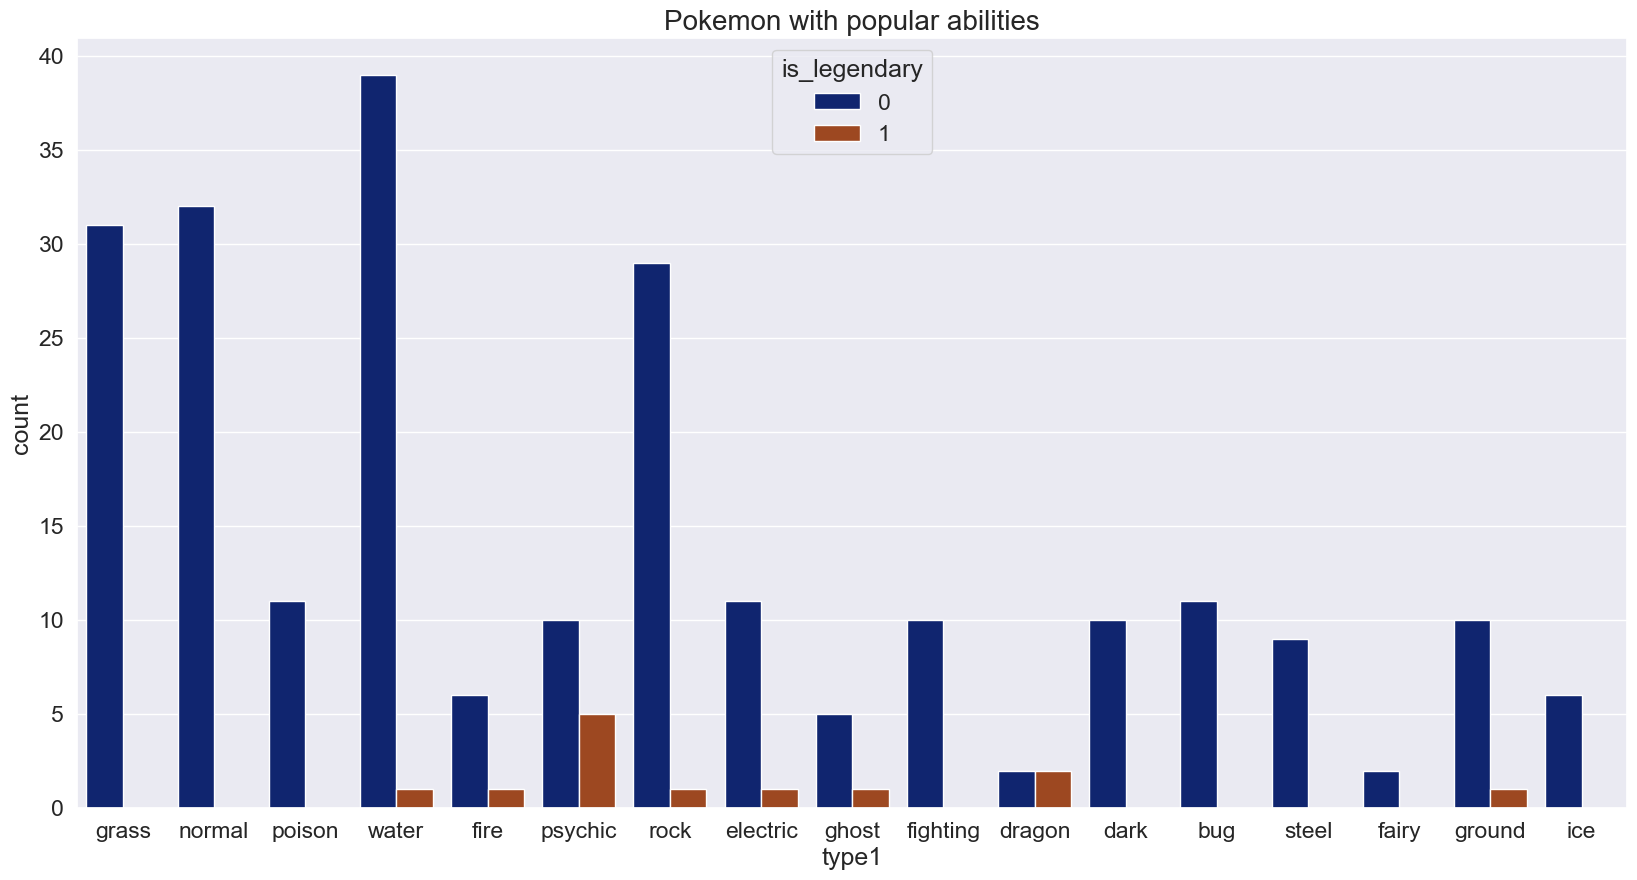

In [71]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = pokemonPopular, x = "type1" , hue = "is_legendary" )
plt.title("Pokemon with popular abilities", fontsize = 20)
plt.show()

In [72]:
pokemonPopular[pokemonPopular.is_legendary == 1]

,abilities,name,generation,is_legendary,type1,type2,type_total
684,Inner Focus,Raikou,2,1,electric,NaN,NaN
686,Inner Focus,Entei,2,1,fire,NaN,NaN
688,Inner Focus,Suicune,2,1,water,NaN,NaN
996,Sturdy,Regirock,3,1,rock,NaN,NaN
1001,Levitate,Latias,3,1,dragon,psychic,dragon psychic
1002,Levitate,Latios,3,1,dragon,psychic,dragon psychic
1234,Levitate,Uxie,4,1,psychic,NaN,NaN
1235,Levitate,Mesprit,4,1,psychic,NaN,NaN
1236,Levitate,Azelf,4,1,psychic,NaN,NaN
1246,Levitate,Giratina,4,1,ghost,dragon,ghost dragon


Pokemon with popular powers are mostly water type and also normal and grass. Several legendary pokemon also uses some most popular powers.  

# Unique powers

In [73]:
unique_powers = powers_count.loc[powers_count == 1].index
unique_powers

Index(['Psychic Surge', 'Grassy Surge', 'Queenly Majesty', 'Triage',
       'Receiver', 'Wimp Out', 'Prism Armor', 'Emergency Exit',
       'Shadow Shield', 'Innards Out', 'RKS System', 'Shields Down',
       'Full Metal Body', 'Comatose', 'Misty Surge', 'Dazzling', 'Berserk',
       'Steelworker', 'Electric Surge', 'Disguise', 'Schooling', 'Imposter',
       'Surge Surfer', 'Zen Mode', 'Battle Bond', 'Victory Star', 'Multitype',
       'Bad Dreams', 'Slow Start', 'Stance Change', 'Flower Gift', 'Air Lock',
       'Color Change', 'Forecast', 'Toxic Boost', 'Pixilate', 'Fairy Aura',
       'Dark Aura', 'Aura Break', 'Power Construct', 'Stall', 'Battery',
       'Dancer', 'Wonder Guard', 'Soul-Heart'],
      dtype='object')

In [74]:
pokemonUnique = powers[powers.abilities.isin(unique_powers)]
pokemonUnique

,abilities,name,generation,is_legendary,type1,type2,type_total
63,Surge Surfer,Raichu,1,0,electric,electric,electric electric
392,Imposter,Ditto,1,0,normal,NaN,NaN
791,Wonder Guard,Shedinja,3,0,bug,ghost,bug ghost
817,Stall,Sableye,3,0,dark,ghost,dark ghost
902,Toxic Boost,Zangoose,3,0,normal,NaN,NaN
935,Forecast,Castform,3,0,normal,NaN,NaN
936,Color Change,Kecleon,3,0,normal,NaN,NaN
1005,Air Lock,Rayquaza,3,1,dragon,flying,dragon flying
1083,Flower Gift,Cherrim,4,0,grass,NaN,NaN
1243,Slow Start,Regigigas,4,1,normal,NaN,NaN


In [75]:
pokemonUnique.is_legendary.value_counts()

0    28
1    17
Name: is_legendary, dtype: int64

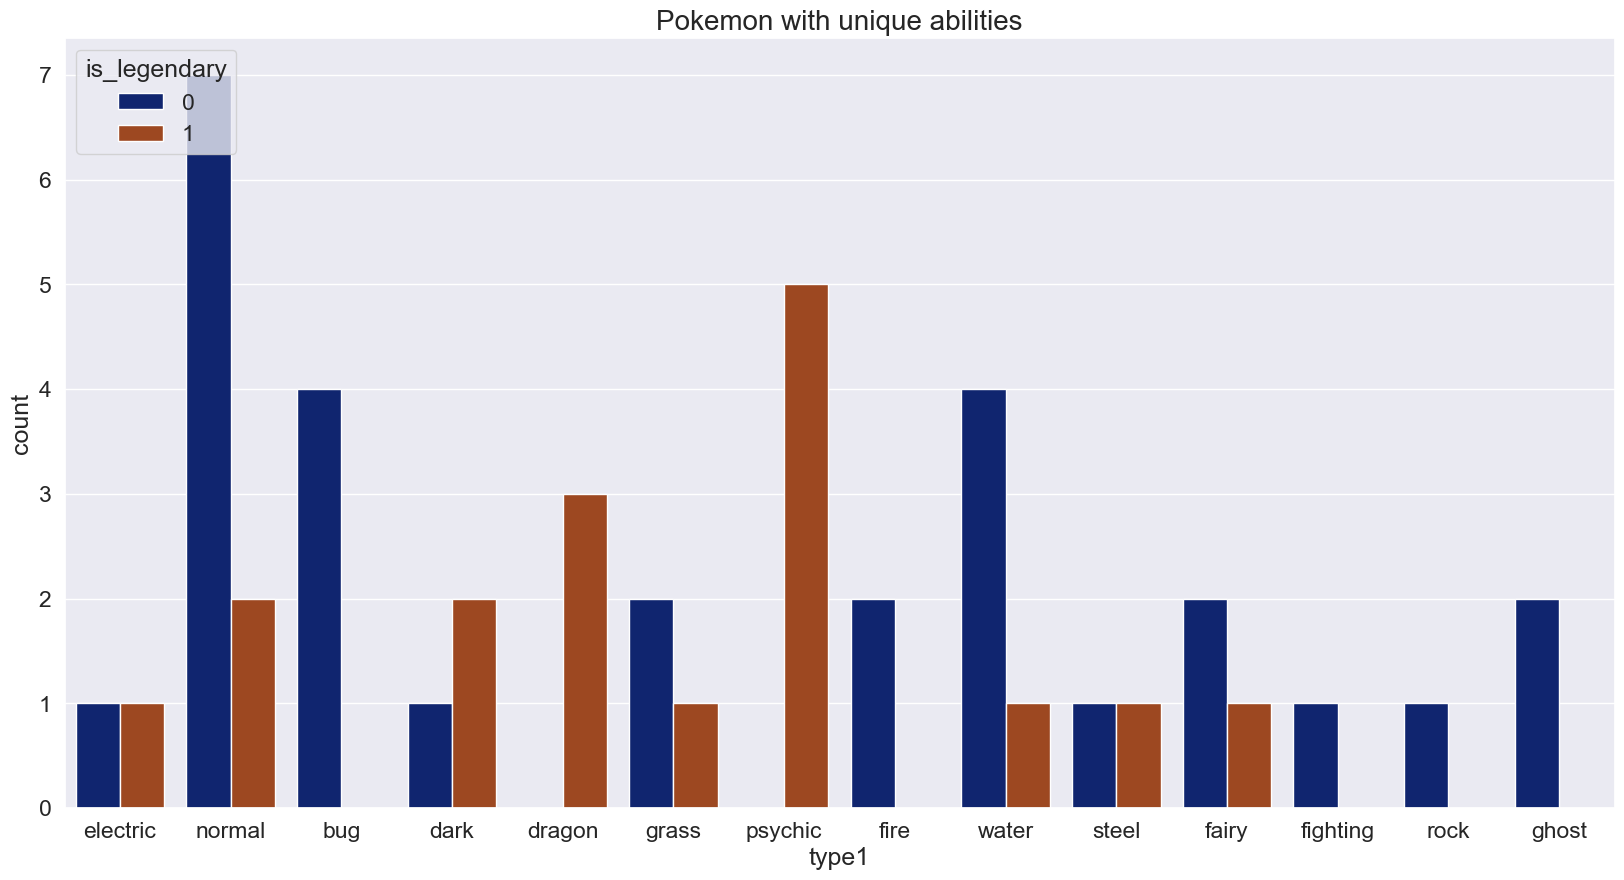

In [76]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = pokemonUnique, x = "type1" , hue = "is_legendary" )
plt.title("Pokemon with unique abilities", fontsize = 20)
plt.show()

Here we can see that some powers are unique for legendary pokemon in psychic and dragon type. Legendary pokemon are more than 1/3 of species in this group. We can also see some unique powers for regular pokemon of diffrent types.

# Conclusions

There are not many dependencies between Pokemon statistics. Creators did not think this aspect enough. There is no way to differenciate legendary pokemon from regular species based only on statistics. There are some rare pokemon types but it is also hard to tell what are the diferences between this group and other species.